# merra2

based on 6hourly inputs, times are for 0, 6, 12 and 18. Therefore bonds would be -3,3 3,9, 9,15, 15,21

QBO is approx. 24 months but can be longer or shorter, so it is hard to look at evolution during a cycle (unlike something
that follows a seasonal cycle).

want to extract easterly and westerly phase of QBO, each one will be a time-series.

take these time-series (approx 120 per month) and find every 1/12 of a cycle to the nearest time.

these fractions of a cycle will describe the normal + and - phase. Average over all of them to form a composite.

then we can look at individual cycles and see how they compare. 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
#import sort
import datetime
import socket
import re
import os
import sys
import netCDF4
import math
import string

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/CMIP6'
  topdir_vm='/OSM/CBR/OA_DCFP/data/CAFEPP'
  topdir_vm='/OSM/CBR/OA_DCFP/work/col414/CAFEPP'
  
os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata
from scipy import signal
from matplotlib import pyplot as plt
from PyAstronomy import pyaC
import xarray as xr
import windspharm as wsh
import pandas as pd
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib as mpl
import pickle
import bz2

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  nino_indices, \
  plot_xy, \
  fractional_year_from_num2date, \
  convert_bytes, \
  file_size, \
  compress_nc, \
  prepare_vertintp, \
  get_exitcode_stdout_stderr, \
  box_indices, \
  plot_box_indices, \
  basic_stats, \
  lagcorr, \
  turning_points, \
  plot_bar
  
from other import year_fraction, \
  cmap_hero, leap_year

from n_data_funcs import n_data_funcs
  
from doppyo import skill
from doppyo import utils
from doppyo import diagnostic
from diagnostic_doppyo_collier import Phillips_criterion, \
  potential_temperature

cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

fluxes_colors={'hfls':'red', 'hfss':'blue', 'rlds':'green', 'rlus':'orange', \
               'rlut':'pink', 'rsdt':'brown', 'rsus':'cyan', 'rsds':'purple', 'rsut':'grey', \
              'net down toa':'tan', 'net down surf':'yellow'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

#print(cafe_experiment_titles[1])

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-35-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


BEGIN
dataxr_merra2_6hourly_ntimes= 56736
dataxr_merra2_ndays_number_days= 2836
dataxr_merra2_ndays_remainder_days= 2840.0
index_months_west_to_east= [  22  195  377  560  663  751  938 1090 1258 1396 1611 1769 1922 2067
 2165 2237 2433 2594 2668 2747]
index_months_east_to_west= [ 105  262  472  648  681  833 1014 1182 1334 1496 1701 1850 1997 2156
 2178 2330 2515 2637 2746 2752]
data_months_west_to_east= [[663, 1611], [1396], [377, 1258, 1769], [22, 751, 1922, 2067, 2433], [], [], [2594, 2668], [2165, 2237, 2747], [195, 560], [], [938], [1090]]
data_months_east_to_west= [[], [2637], [1182], [681, 1334, 1701], [833, 1850, 1997], [105, 472, 1496, 2515], [2156], [262, 2746], [2752], [2178], [648, 1014, 2330], []]


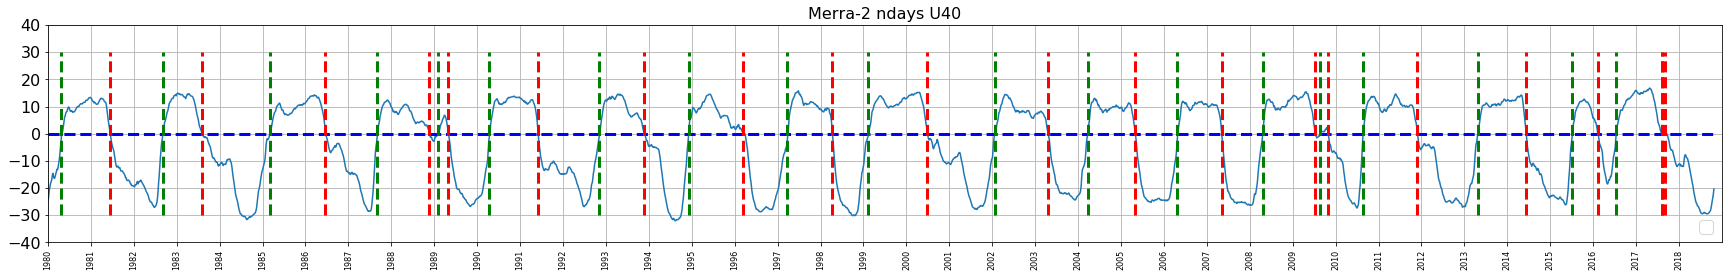

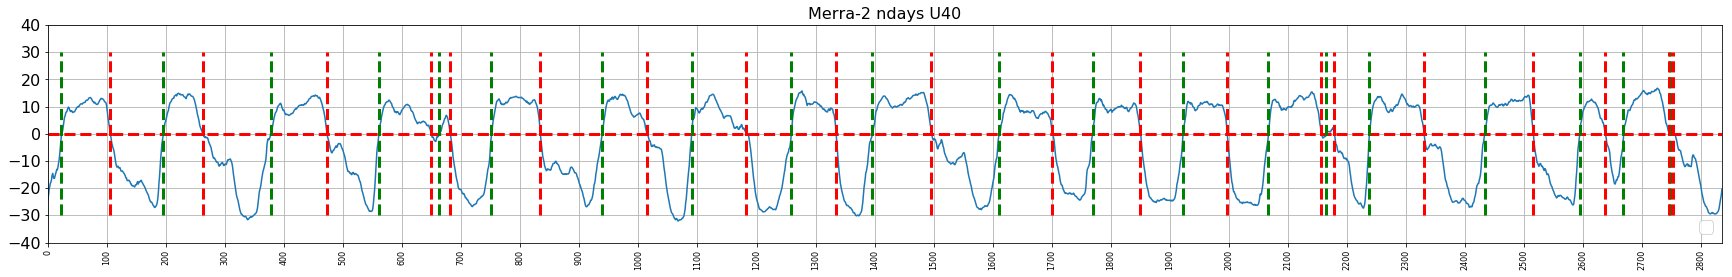

0 half cycle positive len_qbo= 82 410 days 13.666666666666666 months (approx.))
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 0 23.0 23
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 1 43.5 43
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 2 64.0 64
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 3 84.5 84
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 4 105.0 105
slice_index[-1]-slice_index[0]= 82.0
1 half cycle positive len_qbo= 66 330 days 11.0 months (approx.))
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 0 196.0 196
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 1 212.5 212
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 2 229.0 229
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 3 245.5 245
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 4 262.0 262
slice_index[-1]-slice_index[0]= 66.0
2 half cycle positive len_qbo= 94 470 days 15.66

slice_index[-1]-slice_index[0]= 30.0
2 half cycle other len_qbo= 77 385 days 12.833333333333334 months (approx.))
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 0 2669.0 2669
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 1 2688.25 2688
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 2 2707.5 2707
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 3 2726.75 2726
slice_now,slice_index[slice_now],int(slice_index[slice_now])= 4 2746.0 2746
slice_index[-1]-slice_index[0]= 77.0
slice_phase_other= [10001, 20001, 30001, 40001, 50001, 10002, 20002, 30002, 40002, 50002, 10003, 20003, 30003, 40003, 50003]
slice_index_other= [[2595, 2605, 2616, 2626, 2637], [2638, 2645, 2653, 2660, 2668], [2669, 2688, 2707, 2726, 2746]]
slice_index_all= [23, 43, 64, 84, 105, 196, 212, 229, 245, 262, 378, 401, 425, 448, 472, 561, 591, 621, 651, 681, 752, 772, 792, 812, 833, 939, 957, 976, 995, 1014, 1091, 1113, 1136, 1159, 1182, 1259, 1277, 1296, 1315, 1334, 1

jupyter_notebook:490: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
jupyter_notebook:514: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type


pentad_6hourly= [460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479]
clim_6hourly= [460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479]


jupyter_notebook:552: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
jupyter_notebook:553: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


pentad_6hourly= [860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879]
clim_6hourly= [860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879]
pentad_6hourly= [1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299]
clim_6hourly= [1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299]
pentad_6hourly= [216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235]
clim_6hourly= [216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235]
pentad_6hourly= [636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655]
clim_6hourly= [640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659]
pentad_6hourly= [996, 997, 998, 

pentad_6hourly= [340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359]
clim_6hourly= [344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363]
pentad_6hourly= [700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719]
clim_6hourly= [704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723]
pentad_6hourly= [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099]
clim_6hourly= [1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103]
pentad_6hourly= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
clim_6hourly= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
pentad_6hourly= [380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 

pentad_6hourly= [464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483]
clim_6hourly= [468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]
pentad_6hourly= [864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883]
clim_6hourly= [868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887]
pentad_6hourly= [1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283]
clim_6hourly= [1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287]
pentad_6hourly= [204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223]
clim_6hourly= [204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223]
pentad_6hourly= [624, 625, 626, 

pentad_6hourly= [284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303]
clim_6hourly= [284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303]
pentad_6hourly= [644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663]
clim_6hourly= [644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663]
pentad_6hourly= [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043]
clim_6hourly= [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043]
pentad_6hourly= [1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423]
clim_6hourly= [1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422

pentad_6hourly= [1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347]
clim_6hourly= [1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351]
pentad_6hourly= [368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387]
clim_6hourly= [368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387]
pentad_6hourly= [888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907]
clim_6hourly= [888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907]
pentad_6hourly= [1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407]
clim_6hourly= [1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406

0 0 5 [101, 201, 301, 401, 501]
1 5 10 [102, 202, 302, 402, 502]
2 10 15 [103, 203, 303, 403, 503]
3 15 20 [104, 204, 304, 404, 504]
4 20 25 [105, 205, 305, 405, 505]
5 25 30 [106, 206, 306, 406, 506]
6 30 35 [107, 207, 307, 407, 507]
7 35 40 [108, 208, 308, 408, 508]
8 40 45 [109, 209, 309, 409, 509]
9 45 50 [110, 210, 310, 410, 510]
10 50 55 [111, 211, 311, 411, 511]
11 55 60 [112, 212, 312, 412, 512]
12 60 65 [113, 213, 313, 413, 513]
13 65 70 [114, 214, 314, 414, 514]
14 70 75 [115, 215, 315, 415, 515]
15 75 80 [-101, -201, -301, -401, -501]
16 80 85 [-102, -202, -302, -402, -502]
17 85 90 [-103, -203, -303, -403, -503]
18 90 95 [-104, -204, -304, -404, -504]
19 95 100 [-105, -205, -305, -405, -505]
20 100 105 [-106, -206, -306, -406, -506]
21 105 110 [-107, -207, -307, -407, -507]
22 110 115 [-108, -208, -308, -408, -508]
23 115 120 [-109, -209, -309, -409, -509]
24 120 125 [-110, -210, -310, -410, -510]
25 125 130 [-111, -211, -311, -411, -511]
26 130 135 [-112, -212, -312, -412,

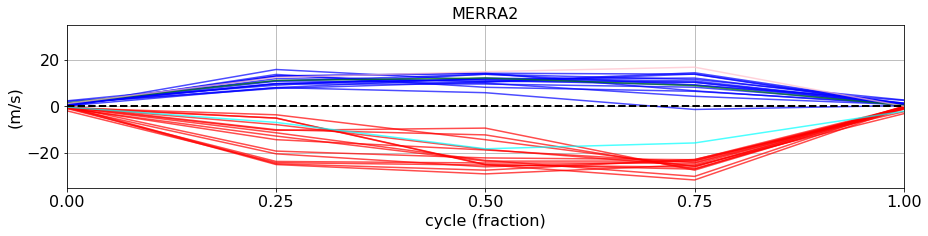

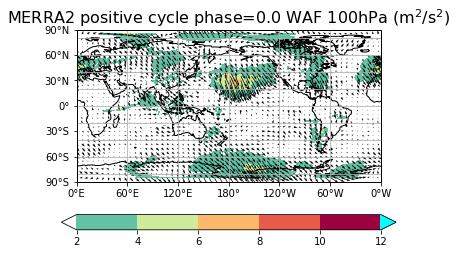

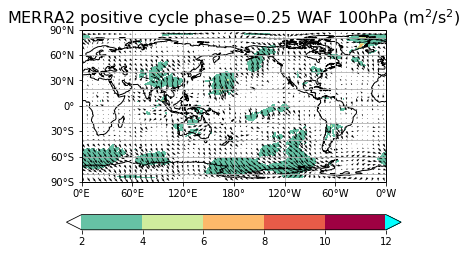

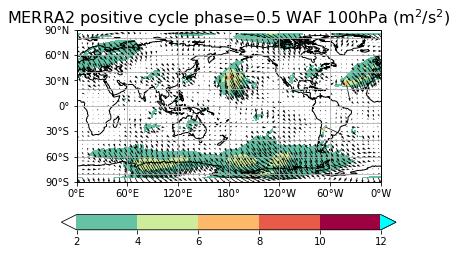

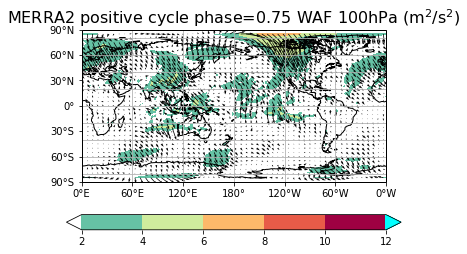

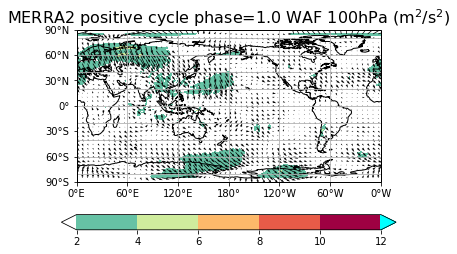

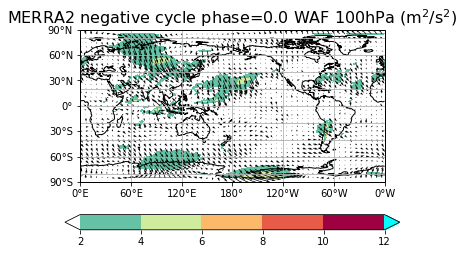

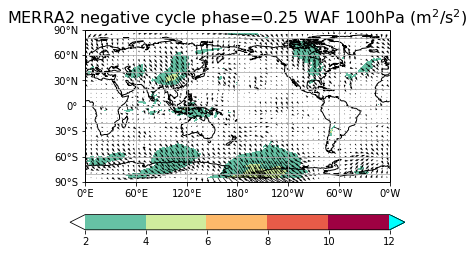

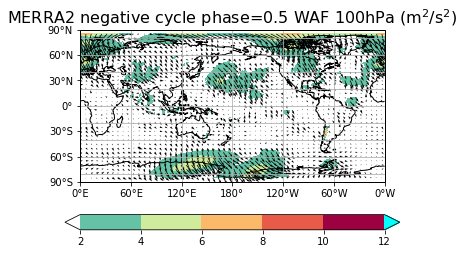

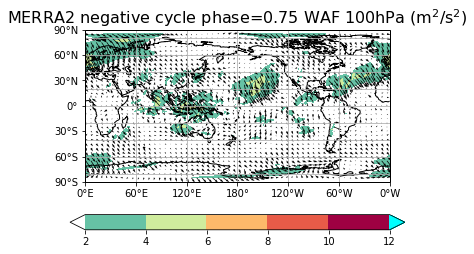

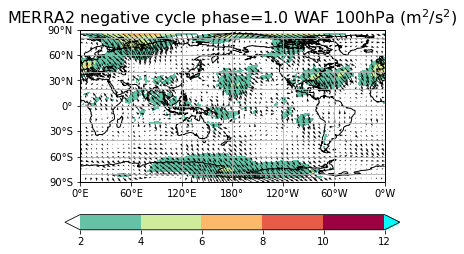

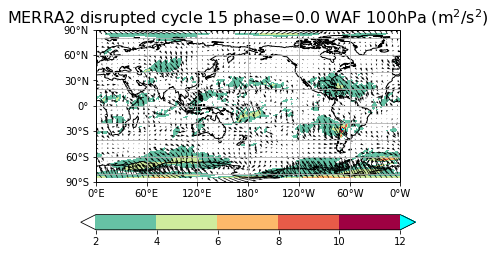

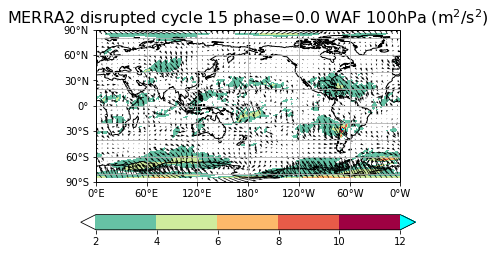

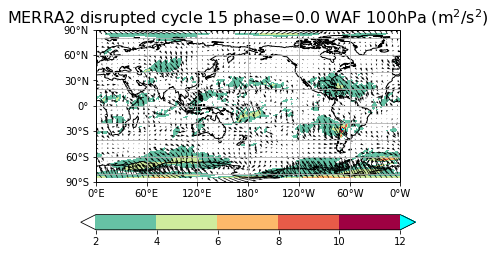

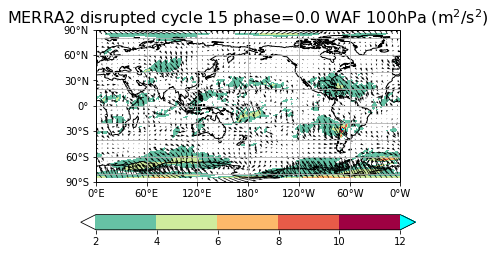

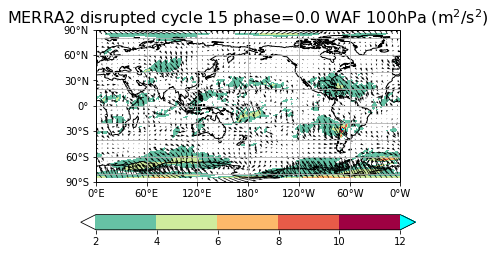

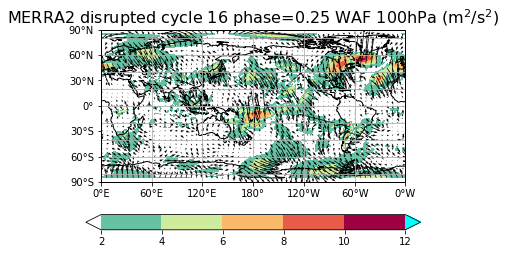

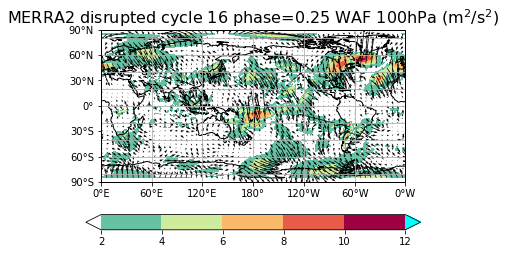

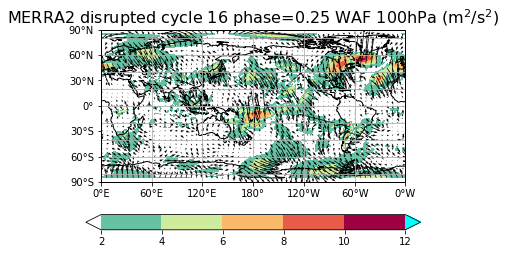

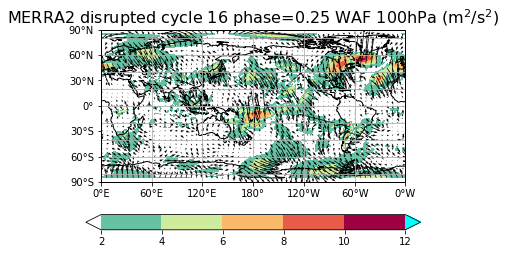

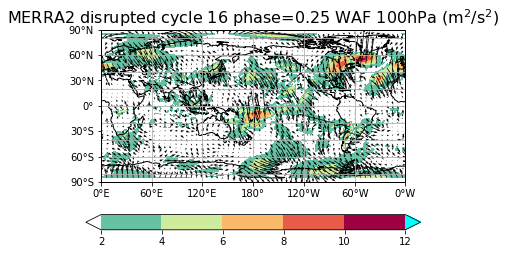

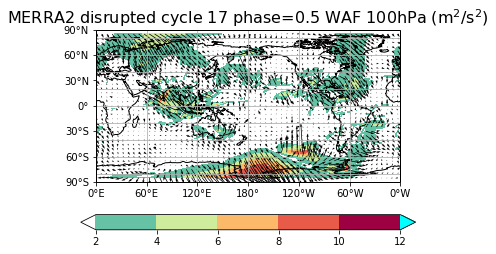

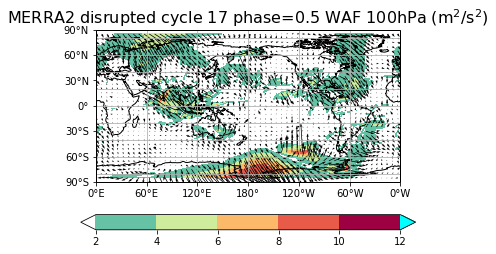

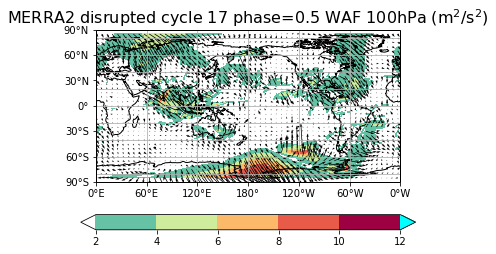

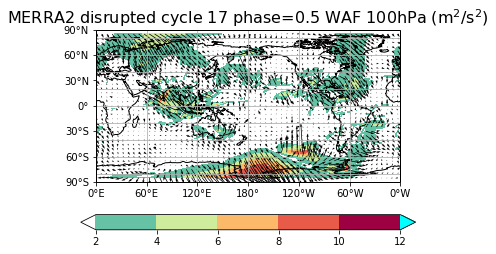

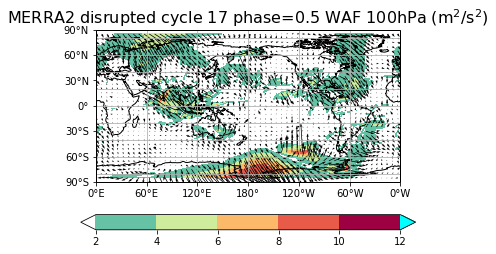

END


In [3]:
print('BEGIN')

#if('merra2_6hourly_ifhN_3D' in locals()): del(merra2_6hourly_ifhN_3D)
  
merra2_6hourly_time_calendar='proleptic_gregorian'
merra2_6hourly_time_units='days since 1980-01-01 00:00'

dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

#AnnOut=False
#AnnOut=True

#ZeroClim=False
#ZeroClim=True

# cbeg=1980
# cend=2000

ndays_in_average=5 #ie pentad
ntimes_per_day=4

FreshStart=True
FreshStart=False #turn off initialisation/creation of certain big/timely data objects to speed up.

SaveFile=False #read from a pkl file.
#SaveFile=True #save to a pkl file.

ybeg_merra2_6hourly=1980 #1980, month=1
yend_merra2_6hourly=2018 #2018, month=10

mbeg_merra2_6hourly=1
mend_merra2_6hourly=10

dbeg_merra2_6hourly=1

if(mend_merra2_6hourly==2 and leap_year(yend_merra2_6hourly, merra2_6hourly_time_calendar)):
  dend_merra2_6hourly=29
else:
  dend_merra2_6hourly=dpm[merra2_6hourly_time_calendar][mend_merra2_6hourly]

idir_merra2_6hourly='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/MERRA2/6hourly'

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_6hourly_time_stamp_beg=[]
merra2_6hourly_time_stamp_end=[]
for year in range(ybeg_merra2_6hourly, yend_merra2_6hourly+1):
  
  if(not leap_year(year, merra2_6hourly_time_calendar)):
    days_in_month=dpm[merra2_6hourly_time_calendar][1:]
  else:
    days_in_month=dpm[merra2_6hourly_time_calendar][1:]
    days_in_month[1]=29
    
  if(year==ybeg_merra2_6hourly):
    mbeg=mbeg_merra2_6hourly
    mend=12
  elif(year==yend_merra2_6hourly):
    mbeg=1
    mend=mend_merra2_6hourly
  else:
    mbeg=1
    mend=12
    
  for month in range(mbeg,mend+1):
    
    if(year==ybeg_merra2_6hourly and month==mbeg_merra2_6hourly):
      dbeg=dbeg_merra2_6hourly
      dend=days_in_month[month-1]
    elif(year==yend_merra2_6hourly and month==mend_merra2_6hourly):
      dbeg=1
      dend=dend_merra2_6hourly
    else:
      dbeg=1
      dend=days_in_month[month-1]
      if(month==2 and leap_year(year, merra2_6hourly_time_calendar)):
        dend=29

    for day in range(dbeg,dend+1):
      
      for hour in range(0,18+6,6):
        
        #print('year,month,day,hour=',year,month,day,hour)
        merra2_6hourly_time_stamp_beg.append(datetime.datetime(year, month, day) + datetime.timedelta(hours=hour-3.0))
        merra2_6hourly_time_stamp_end.append(datetime.datetime(year, month, day) + datetime.timedelta(hours=hour+3.0))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_6hourly_time_beg = netCDF4.date2num(merra2_6hourly_time_stamp_beg, merra2_6hourly_time_units, merra2_6hourly_time_calendar)
merra2_6hourly_time_end = netCDF4.date2num(merra2_6hourly_time_stamp_end, merra2_6hourly_time_units, merra2_6hourly_time_calendar)
merra2_6hourly_time_avg = (merra2_6hourly_time_beg+merra2_6hourly_time_end)/2.0
merra2_6hourly_date_time_stamps = netCDF4.num2date(merra2_6hourly_time_avg, merra2_6hourly_time_units, merra2_6hourly_time_calendar)
merra2_6hourly_num_time_values = netCDF4.date2num(merra2_6hourly_date_time_stamps, merra2_6hourly_time_units, merra2_6hourly_time_calendar)
merra2_6hourly_year_fractions = fractional_year_from_num2date(merra2_6hourly_date_time_stamps, merra2_6hourly_time_calendar)

#print(merra2_date_time_stamps)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

if(FreshStart):
  time_index_beg = 0
  for year in range(ybeg_merra2_6hourly, yend_merra2_6hourly+1):
    print('year=',year)
    
    ifil_merra2_6hourly_3D=[]

    if(year==ybeg_merra2_6hourly):
      mbeg=mbeg_merra2_6hourly
      mend=12
    elif(year==yend_merra2_6hourly):
      mbeg=1
      mend=mend_merra2_6hourly
    else:
      mbeg=1
      mend=12 

    for month in range(mbeg, mend+1):
      #print('year,month=',year,month)
      YYYY='{0:04d}'.format(year)
      MM='{0:02d}'.format(month)
      ifil_merra2_6hourly_3D+=glob.glob(idir_merra2_6hourly+'/'+'MERRA2_?00.inst6_3d_ana_Np.'+YYYY+MM+'??.nc')

    input_files_merra2_6hourly_3D=sorted(ifil_merra2_6hourly_3D)

    #print('input_files_merra2_6hourly_3D=',input_files_merra2_6hourly_3D)

    merra2_6hourly_ifhN_3D = netCDF4.MFDataset(input_files_merra2_6hourly_3D, 'r')

    merra2_6hourly_U = merra2_6hourly_ifhN_3D.variables['U']
    merra2_6hourly_V = merra2_6hourly_ifhN_3D.variables['V']
    
    merra2_6hourly_U_shape = merra2_6hourly_U.shape
    merra2_6hourly_V_shape = merra2_6hourly_V.shape

    print('merra2_6hourly_U_shape=',merra2_6hourly_U_shape)
    
    if(year==ybeg_merra2_6hourly):

      merra2_6hourly_lats = merra2_6hourly_ifhN_3D.variables['lat'][:]
      merra2_6hourly_nlat = merra2_6hourly_lats.size
      merra2_6hourly_lons = merra2_6hourly_ifhN_3D.variables['lon'][:]
      merra2_6hourly_nlon = merra2_6hourly_lons.size
      merra2_6hourly_levs = merra2_6hourly_ifhN_3D.variables['lev'][:]
      merra2_6hourly_nlev = merra2_6hourly_levs.size
      
      new_merra2_6hourly_lons = merra2_6hourly_lons
      new_merra2_6hourly_lons = np.where(new_merra2_6hourly_lons<0, new_merra2_6hourly_lons+360, new_merra2_6hourly_lons)
      new_merra2_6hourly_lons = np.roll(new_merra2_6hourly_lons, 287)
      new_merra2_6hourly_lons[-1] = 360.0

      lev_40hPa = np.abs(merra2_6hourly_levs - 40).argmin()
      time_series = ma.zeros(merra2_6hourly_year_fractions.shape, dtype=float)
      
################################################################################
        
    time_index_end = time_index_beg+merra2_6hourly_U_shape[0]-1
    print('time_index_beg,time_index_end=',time_index_beg,time_index_end)
    time_series[time_index_beg:time_index_end+1] = np.average(np.average(merra2_6hourly_U[:,lev_40hPa,170:190+1,:], axis=-1), axis=-1)
    time_index_beg = time_index_end + 1
                 
    merra2_6hourly_ifhN_3D.close()

#print('time_series.shape=',time_series.shape)
#only create time-series, especially when over many years...
  
save_file='merra2_6hourly_'+str(ybeg_merra2_6hourly)+'-'+str(yend_merra2_6hourly)+'.pkl'
if(SaveFile):
  
  if(os.path.exists(save_file)): os.remove(save_file)
    
  dataxr_merra2_6hourly_QBO = xr.DataArray(time_series, coords=[('time', merra2_6hourly_date_time_stamps.tolist())])

  pkl_objects = (dataxr_merra2_6hourly_QBO, \
                 merra2_6hourly_year_fractions, \
                 merra2_6hourly_levs, merra2_6hourly_nlev, \
                 merra2_6hourly_lats, merra2_6hourly_nlat, \
                 merra2_6hourly_lons, merra2_6hourly_nlon, \
                )
  pickling_out = bz2.BZ2File(save_file, "wb")
  pickle.dump( pkl_objects, pickling_out, protocol=4)
  pickling_out.close()
  raise SystemExit('Getting out after writing out save file '+save_file+':'+__file__+' line number: '+str(inspect.stack()[0][2]))
else:
  pickling_in = bz2.BZ2File(save_file, "rb")
#   dataxr_merra2_6hourly_QBO, merra2_6hourly_year_fractions = pickle.load(pickling_in)
#uncomment later:
  dataxr_merra2_6hourly_QBO, merra2_6hourly_year_fractions, \
    merra2_6hourly_levs, merra2_6hourly_nlev, \
    merra2_6hourly_lats, merra2_6hourly_nlat, \
    merra2_6hourly_lons, merra2_6hourly_nlon, = pickle.load(pickling_in)
  pickling_in.close()

  new_merra2_6hourly_lons = merra2_6hourly_lons
  new_merra2_6hourly_lons = np.where(new_merra2_6hourly_lons<0, new_merra2_6hourly_lons+360, new_merra2_6hourly_lons)
  new_merra2_6hourly_lons = np.roll(new_merra2_6hourly_lons, 287)
  new_merra2_6hourly_lons[-1] = 360.0
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################

dataxr_merra2_6hourly_times = dataxr_merra2_6hourly_QBO['time'] #total_times
dataxr_merra2_6hourly_ntimes = dataxr_merra2_6hourly_times.size

print('dataxr_merra2_6hourly_ntimes=',dataxr_merra2_6hourly_ntimes)

dataxr_merra2_6hourly_total_days = dataxr_merra2_6hourly_ntimes / ntimes_per_day

dataxr_merra2_ndays_number_days = int(dataxr_merra2_6hourly_total_days / ndays_in_average)

print('dataxr_merra2_ndays_number_days=',dataxr_merra2_ndays_number_days)

dataxr_merra2_ndays_remainder_days = dataxr_merra2_6hourly_total_days - dataxr_merra2_ndays_number_days*ntimes_per_day

print('dataxr_merra2_ndays_remainder_days=',dataxr_merra2_ndays_remainder_days)

#truncate of any times at end of series that do not conform exactly to the ndays shape, reshape, average.
dataxr_merra2_ndays_data = np.average(np.reshape(dataxr_merra2_6hourly_QBO.values[0:dataxr_merra2_ndays_number_days*ndays_in_average*ntimes_per_day],(dataxr_merra2_ndays_number_days,ndays_in_average*ntimes_per_day)),axis=-1)

dataxr_merra2_6hourly_times_year = dataxr_merra2_6hourly_QBO['time.year'].values.tolist()
dataxr_merra2_6hourly_times_month = dataxr_merra2_6hourly_QBO['time.month'].values.tolist()
dataxr_merra2_6hourly_times_day = dataxr_merra2_6hourly_QBO['time.day'].values.tolist()
dataxr_merra2_6hourly_times_hour = dataxr_merra2_6hourly_QBO['time.hour'].values.tolist()
dataxr_merra2_6hourly_times_minute = dataxr_merra2_6hourly_QBO['time.minute'].values.tolist()

#these are the pentads starting from 0, the beginning of the data time-series.
merra2_6hourly_pentad_indices = np.reshape(range(dataxr_merra2_ndays_number_days*ndays_in_average*ntimes_per_day), (dataxr_merra2_ndays_number_days,ndays_in_average*ntimes_per_day))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

dataxr_merra2_6hourly_times_stamp = []
for cnt in range(dataxr_merra2_6hourly_ntimes):
  dataxr_merra2_6hourly_times_stamp.append( datetime.datetime(dataxr_merra2_6hourly_times_year[cnt], dataxr_merra2_6hourly_times_month[cnt], dataxr_merra2_6hourly_times_day[cnt]) + datetime.timedelta(hours=dataxr_merra2_6hourly_times_hour[cnt]) )

dataxr_merra2_6hourly_times_num = netCDF4.date2num(dataxr_merra2_6hourly_times_stamp, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

merra2_ndays_time_avg = np.average(np.reshape(dataxr_merra2_6hourly_times_num[0:dataxr_merra2_ndays_number_days*ndays_in_average*ntimes_per_day],(dataxr_merra2_ndays_number_days,ndays_in_average*ntimes_per_day)),axis=-1)

merra2_ndays_date_time_stamps = netCDF4.num2date(merra2_ndays_time_avg, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

merra2_ndays_year_fractions = fractional_year_from_num2date(merra2_ndays_date_time_stamps, merra2_6hourly_time_calendar)

dataxr_merra2_ndays_QBO = xr.DataArray(dataxr_merra2_ndays_data, coords=[('time', merra2_ndays_date_time_stamps.tolist())])
  
#print('dataxr_merra2_ndays_QBO=',dataxr_merra2_ndays_QBO)

#data_sign=np.sign(dataxr_merra2_6hourly_QBO)
data_sign = np.sign(dataxr_merra2_ndays_QBO)

#print('data_sign=',data_sign)

#data_sign.shape

data_sign_diff = data_sign[1:].values - data_sign[0:-1].values

#print('data_sign_diff=',data_sign_diff)

index_months_west_to_east, = np.where(data_sign_diff==2) #west to east (or easterly to westerly)

index_months_east_to_west, = np.where(data_sign_diff==-2) #east to west (or westerly to easterly)

print('index_months_west_to_east=',index_months_west_to_east) #negative to positive

print('index_months_east_to_west=',index_months_east_to_west) #positive to negative

data_months_west_to_east = [[],[],[],[],[],[],[],[],[],[],[],[]]
data_months_east_to_west = [[],[],[],[],[],[],[],[],[],[],[],[]]

for k in index_months_west_to_east:
  #print(k,merra2_6hourly_date_time_stamps[k].year,merra2_6hourly_date_time_stamps[k].month)
  #data_months_west_to_east[merra2_6hourly_date_time_stamps[k].month-1].append(k)
  data_months_west_to_east[merra2_ndays_date_time_stamps[k].month-1].append(k)
  
for k in index_months_east_to_west:
  #print(k,merra2_6hourly_date_time_stamps[k].year,merra2_6hourly_date_time_stamps[k].month)
  #data_months_east_to_west[merra2_6hourly_date_time_stamps[k].month-1].append(k)
  data_months_east_to_west[merra2_ndays_date_time_stamps[k].month-1].append(k)
  
print('data_months_west_to_east=',data_months_west_to_east)
print('data_months_east_to_west=',data_months_east_to_west)

################################################################################

xticks = year_fraction(merra2_ndays_date_time_stamps[0].year, \
                       merra2_ndays_date_time_stamps[-1].year, \
                       mbeg = merra2_ndays_date_time_stamps[0].month, \
                       mend = merra2_ndays_date_time_stamps[-1].month) #this will give monthly fractions, beginning of each month.

xticks = range(ybeg_merra2_6hourly, yend_merra2_6hourly+1)

#print(year_fraction(2016,2016,mbeg=1,mend=12))
                                    
xysize=(30,4)

polygons = ([merra2_ndays_year_fractions[0],merra2_ndays_year_fractions[-1],0,0,'blue','--',3],)

for index in index_months_west_to_east:
  polygons = polygons + ([merra2_ndays_year_fractions[index],merra2_ndays_year_fractions[index],-30,30,'green','--',3],)
for index in index_months_east_to_west:
  polygons = polygons + ([merra2_ndays_year_fractions[index],merra2_ndays_year_fractions[index],-30,30,'red','--',3],)

plot_xy(Diag=False, \
        input_data=(dataxr_merra2_ndays_QBO,), \
        input_xvals=(merra2_ndays_year_fractions,), \
        grid=True, \
        title='Merra-2 ndays U40', \
        units='m/s', \
        xysize=xysize, \
        xticks=xticks, \
        xticks_fontsize=8, \
        x_lab_rotation=90, \
         xlim=[ybeg_merra2_6hourly, yend_merra2_6hourly+1], \
        line_colors=['red'], \
        line_labels=['6hourly'], \
        polygons=polygons \
       )

polygons=([0,len(merra2_ndays_year_fractions),0,0,'red','--',3],)

for index in index_months_west_to_east:
  polygons = polygons + ([index,index,-30,30,'green','--',3],)
for index in index_months_east_to_west:
  polygons = polygons + ([index,index,-30,30,'red','--',3],)
  
xticks = list(range(0,len(merra2_ndays_year_fractions),100))
  
plot_xy(Diag=False, \
        input_data=(dataxr_merra2_ndays_QBO,), \
        input_xvals=(range(0,len(merra2_ndays_year_fractions)),), \
        grid=True, \
        title='Merra-2 ndays U40', \
        units='m/s', \
        xysize=xysize, \
        xticks=xticks, \
        xticks_fontsize=8, \
        x_lab_rotation=90, \
        xlim=[0, len(merra2_ndays_year_fractions)-1], \
        line_colors=['red'], \
        line_labels=['6hourly'], \
        polygons=polygons \
       )

################################################################################

#these are generated from numbers given above, plus corrected using time-series plot to remove parts of the time series that are not really in
#a positive or negative state.

#full postiive QBO cycle is between times
positive_qbos = []
positive_qbos.append([22+1,105]) #0
positive_qbos.append([195+1,262]) #1
positive_qbos.append([377+1,472]) #2
positive_qbos.append([560+1,681]) #3, original had 648.
positive_qbos.append([751+1,833]) #4
positive_qbos.append([938+1,1014]) #5
positive_qbos.append([1090+1,1182]) #6
positive_qbos.append([1258+1,1334]) #7
positive_qbos.append([1396+1,1496]) #8
positive_qbos.append([1611+1,1701]) #9
positive_qbos.append([1769+1,1850]) #10
positive_qbos.append([1922+1,1997]) #11
positive_qbos.append([2067+1,2178]) #12, original had 2156.
positive_qbos.append([2237+1,2330]) #13
positive_qbos.append([2433+1,2515]) #14

#full negative QBO cycle is between times
negative_qbos = []
negative_qbos.append([105+1,195]) #0
negative_qbos.append([262+1,377]) #1
negative_qbos.append([472+1,560]) #2
negative_qbos.append([681+1,751]) #3
negative_qbos.append([833+1,938]) #4
negative_qbos.append([1014+1,1090]) #5
negative_qbos.append([1182+1,1258]) #6
negative_qbos.append([1334+1,1396]) #7
negative_qbos.append([1496+1,1611]) #8
negative_qbos.append([1701+1,1769]) #9
negative_qbos.append([1850+1,1922]) #10
negative_qbos.append([1997+1,2067]) #11
negative_qbos.append([2178+1,2237]) #12
negative_qbos.append([2330+1,2433]) #13
negative_qbos.append([2515+1,2594]) #14

other_qbos = []
other_qbos.append([2594+1,2637]) #positive 15
other_qbos.append([2637+1,2668]) #negative 16
other_qbos.append([2668+1,2746]) #positive 17

#2 sets of positive/negative phases (pairs, 1-15) over 1980-2018 period.
#3 more half phases 16,17,18 of QBO interuption. positive: 2594+1->2637=42, negative:2637+1->2668=30, positive: 2668+1->2746=77

slices_per_half_cycle = 9
slices_per_half_cycle = 19
slices_per_half_cycle = 5 #roughly 6 per month with pentads.

slice_phase_positive=[]
slice_index_positive=[]
for cnt,positive_qbo in enumerate(positive_qbos):
  len_qbo = positive_qbo[1]-positive_qbo[0]+0
  print(str(cnt)+' half cycle positive len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for CNT,slice_now in enumerate(range(slices_per_half_cycle)):
    slice_phase_positive.append((cnt+1)+(CNT+1)*100)
    slice_index.append(     positive_qbos[cnt][0] + len_qbo*slice_now/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice_now],int(slice_index[slice_now])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_positive.append( list(map(int, slice_index)) )
print('slice_phase_positive=',slice_phase_positive)
print('slice_index_positive=',slice_index_positive)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

slice_phase_negative=[]
slice_index_negative=[]
for cnt,negative_qbo in enumerate(negative_qbos):
  len_qbo = negative_qbo[1]-negative_qbo[0]+0
  print(str(cnt)+' half cycle negative len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for CNT,slice_now in enumerate(range(slices_per_half_cycle)):
    slice_phase_negative.append((cnt+1)*-1+(CNT+1)*-100)
    slice_index.append(     negative_qbos[cnt][0] + len_qbo*slice_now/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice_now],int(slice_index[slice_now])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_negative.append( list(map(int, slice_index)) )
print('slice_phase_negative=',slice_phase_negative)
print('slice_index_negative=',slice_index_negative)

slice_phase_other=[]
slice_index_other=[]
for cnt,other_qbo in enumerate(other_qbos):
  len_qbo = other_qbo[1]-other_qbo[0]+0
  print(str(cnt)+' half cycle other len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for CNT,slice_now in enumerate(range(slices_per_half_cycle)):
    slice_phase_other.append((cnt+1)+(CNT+1)*10000)
    slice_index.append(     other_qbos[cnt][0] + len_qbo*slice_now/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice_now],int(slice_index[slice_now])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_other.append( list(map(int, slice_index)) )
print('slice_phase_other=',slice_phase_other)
print('slice_index_other=',slice_index_other)

slice_index_all = [x for xs in [*slice_index_positive, *slice_index_negative, *slice_index_other] for x in xs] #go positive then negative, as this is the order from 1980.

print('slice_index_all=',slice_index_all)

slice_phase_all = [x for xs in [slice_phase_positive, slice_phase_negative, slice_phase_other] for x in xs] #go positive then negative, as this is the order from 1980.

print('slice_phase_all=',slice_phase_all)

################################################################################

#here use daily climatologies, these will be used to form anomalies for the PSI_ANOM and WAF calculation.

merra2_6hourly_ifhN_3D_U_clim = netCDF4.Dataset('merra2_sixhourly_1980-2000_clim_U.nc', 'r')
merra2_6hourly_ifhN_3D_V_clim = netCDF4.Dataset('merra2_sixhourly_1980-2000_clim_V.nc', 'r')

merra2_6hourly_clim_num_time_values_all = merra2_6hourly_ifhN_3D_U_clim.variables['time'][:]
merra2_6hourly_clim_date_time_stamps_all = netCDF4.num2date(merra2_6hourly_clim_num_time_values_all, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################

for cnt,slice_index_now in enumerate(slice_index_all):
  #print(slice_index_now)
  
  years_to_process = [] #could be more than 1 year involved (untested).
  merra2_6hourly_pentad_date_time_stamps = [] #these are all the 6-hourly times used in the pentad (20 for ndays=5)
  merra2_6hourly_clim_date_time_stamps = [] #dates in the single year climatology file.
  
  for indice in merra2_6hourly_pentad_indices[slice_index_now]:
    merra2_6hourly_pentad_date_time_stamps.append( datetime.datetime( \
    dataxr_merra2_6hourly_times_year[indice], \
    dataxr_merra2_6hourly_times_month[indice], \
    dataxr_merra2_6hourly_times_day[indice]) + \
    datetime.timedelta(hours=dataxr_merra2_6hourly_times_hour[indice]))
    years_to_process.append( dataxr_merra2_6hourly_times_year[indice] )
    
    #clim file only has one year, 1980.
    merra2_6hourly_clim_date_time_stamps.append( datetime.datetime( \
        1980, \
        dataxr_merra2_6hourly_times_month[indice], \
        dataxr_merra2_6hourly_times_day[indice]) + \
        datetime.timedelta(hours=dataxr_merra2_6hourly_times_hour[indice]))

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  years_to_process = list(set(years_to_process))

  #print('merra2_6hourly_pentad_date_time_stamps=',merra2_6hourly_pentad_date_time_stamps)

  #print('years_to_process=',years_to_process)

  for year in years_to_process:
    #print('year=',year)

    ifil_merra2_6hourly_3D=[]

    if(year==ybeg_merra2_6hourly):
      mbeg=mbeg_merra2_6hourly
      mend=12
    elif(year==yend_merra2_6hourly):
      mbeg=1
      mend=mend_merra2_6hourly
    else:
      mbeg=1
      mend=12 

    for month in range(mbeg, mend+1):
      #print('year,month=',year,month)
      YYYY='{0:04d}'.format(year)
      MM='{0:02d}'.format(month)
      ifil_merra2_6hourly_3D+=glob.glob(idir_merra2_6hourly+'/'+'MERRA2_?00.inst6_3d_ana_Np.'+YYYY+MM+'??.nc')

  input_files_merra2_6hourly_3D=sorted(ifil_merra2_6hourly_3D)

  #print('input_files_merra2_6hourly_3D=',input_files_merra2_6hourly_3D)

  merra2_6hourly_ifhN_3D = netCDF4.MFDataset(input_files_merra2_6hourly_3D, 'r')

  local_times = merra2_6hourly_ifhN_3D.variables['time']

  local_units = local_times.units

  #print('local_times[0]=',local_times[0])

  #print('local_units=',local_units)

  first_date_time = netCDF4.num2date(local_times[0], local_units, merra2_6hourly_time_calendar)

  #print('first_date_time=',first_date_time)

  first_num_time = netCDF4.date2num(first_date_time, local_units, merra2_6hourly_time_calendar)

  #print('first_num_time=',first_num_time)

  merra2_6hourly_U = merra2_6hourly_ifhN_3D.variables['U']
  merra2_6hourly_U_shape = merra2_6hourly_U.shape

  merra2_6hourly_V = merra2_6hourly_ifhN_3D.variables['V']
  merra2_6hourly_V_shape = merra2_6hourly_V.shape
  
  merra2_6hourly_PS = merra2_6hourly_ifhN_3D.variables['PS']
  merra2_6hourly_PS_shape = merra2_6hourly_U.shape
  
  merra2_6hourly_U_clim = merra2_6hourly_ifhN_3D_U_clim.variables['data']
  merra2_6hourly_V_clim = merra2_6hourly_ifhN_3D_V_clim.variables['data']
  
  days = np.arange(merra2_6hourly_U_shape[0])*(1/ntimes_per_day)

  #print('days=',days)

  all_date_times = netCDF4.num2date(days+local_times[0], local_units.replace('minutes','days'), merra2_6hourly_time_calendar)

  #print('all_date_times=',all_date_times)
  # print('merra2_6hourly_U_shape=',merra2_6hourly_U_shape)

  all_num_times = netCDF4.date2num(all_date_times, local_units.replace('minutes','days'), merra2_6hourly_time_calendar)

  #print('all_num_times=',all_num_times)

  #THIS IS WHERE NEED TO FORM fractional snapshots of atmosphere to describe evolution of negative and positive phases of QBO.
  #As actual files are available to extract from during each pass.

  if(slice_index_now==slice_index_all[0]):
    data_ndays_U = np.zeros((len(slice_index_all), merra2_6hourly_nlev, merra2_6hourly_nlat, merra2_6hourly_nlon), dtype=float)
    data_ndays_V = np.zeros((len(slice_index_all), merra2_6hourly_nlev, merra2_6hourly_nlat, merra2_6hourly_nlon), dtype=float)
    data_ndays_PS = np.zeros((len(slice_index_all), merra2_6hourly_nlat, merra2_6hourly_nlon), dtype=float)
    data_ndays_U_clim = np.zeros((len(slice_index_all), merra2_6hourly_nlev, merra2_6hourly_nlat, merra2_6hourly_nlon), dtype=float)
    data_ndays_V_clim = np.zeros((len(slice_index_all), merra2_6hourly_nlev, merra2_6hourly_nlat, merra2_6hourly_nlon), dtype=float)
    
  j=[]
  for merra2_6hourly_pentad_date_time_stamp in merra2_6hourly_pentad_date_time_stamps:
    j.append( np.where(merra2_6hourly_pentad_date_time_stamp == all_date_times) )
  pentad_6hourly=[]
  for jj in j:
    pentad_6hourly.append(jj[0][0])
  print('pentad_6hourly=',pentad_6hourly)
  
  k=[]
  for merra2_6hourly_clim_date_time_stamp in merra2_6hourly_clim_date_time_stamps:
    k.append( np.where(merra2_6hourly_clim_date_time_stamp == merra2_6hourly_clim_date_time_stamps_all) )
  clim_6hourly=[]
  for kk in k:
    clim_6hourly.append(kk[0][0])
  print('clim_6hourly=',clim_6hourly)    

  data_ndays_U[cnt,] = np.average(merra2_6hourly_U[pentad_6hourly,],axis=0)
  data_ndays_V[cnt,] = np.average(merra2_6hourly_V[pentad_6hourly,],axis=0)
  data_ndays_PS[cnt,] = np.average(merra2_6hourly_PS[pentad_6hourly,],axis=0)
  data_ndays_U_clim[cnt,] = np.average(merra2_6hourly_U_clim[clim_6hourly,],axis=0)
  data_ndays_V_clim[cnt,] = np.average(merra2_6hourly_V_clim[clim_6hourly,],axis=0)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  xysize=(9,4)
  cmap='rainbow'
  clevs=None
  step=20;clevs=sorted(list(set(np.arange(-100, 100+step, step).tolist())))
  cmap = cmap_hero(clevs, \
                Diag=-1, \
                middle2white=True, \
                negative_infinity='pink', \
                positive_infinity='cyan', \
                first_cmap='Spectral_r', \
                first_fraction=[0,.4], \
                last_cmap='Spectral', \
                last_fraction=[0,.4], \
                first_flip=False, \
                last_flip=True)

#   shade_2d_simple(np.average(np.average(merra2_6hourly_U[k,:,:,:],axis=0),axis=-1), \
#     title='MERRA2 '+str(slice_phase_all[cnt]), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
#     grid=True, \
#     clevs=clevs, \
#     cmap=cmap, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40, \
#               'red', \
#               '--', \
#               5],) \
#     )

  merra2_6hourly_ifhN_3D.close()
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

fraction_date_times = merra2_ndays_date_time_stamps[slice_index_all]

print('fraction_date_times=',fraction_date_times)

fraction_num_times = netCDF4.date2num(fraction_date_times, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

print('fraction_num_times=',fraction_num_times)

#this will contain all the data for pentads through each of the QBO phases, as there are not many times overall it can be held in memory:
#from this it is easy to create reduced outputs using xarray.
dataxr_merra2_ndays_U = xr.DataArray(np.roll(data_ndays_U,287, axis=-1), \
  coords=[('time', fraction_date_times.tolist()), \
          ('level', merra2_6hourly_levs), \
          ('lat', merra2_6hourly_lats), \
          ('lon', new_merra2_6hourly_lons)])

dataxr_merra2_ndays_V = xr.DataArray(np.roll(data_ndays_V,287, axis=-1), \
  coords=[('time', fraction_date_times.tolist()), \
          ('level', merra2_6hourly_levs), \
          ('lat', merra2_6hourly_lats), \
          ('lon', new_merra2_6hourly_lons)])

dataxr_merra2_ndays_PS = xr.DataArray(np.roll(data_ndays_PS,287, axis=-1), \
  coords=[('time', fraction_date_times.tolist()), \
          ('lat', merra2_6hourly_lats), \
          ('lon', new_merra2_6hourly_lons)])

#don't have to roll these, already done.
dataxr_merra2_ndays_U_clim = xr.DataArray(data_ndays_U_clim, \
  coords=[('time', fraction_date_times.tolist()), \
          ('level', merra2_6hourly_levs), \
          ('lat', merra2_6hourly_lats), \
          ('lon', new_merra2_6hourly_lons)])

dataxr_merra2_ndays_V_clim = xr.DataArray(data_ndays_V_clim, \
  coords=[('time', fraction_date_times.tolist()), \
          ('level', merra2_6hourly_levs), \
          ('lat', merra2_6hourly_lats), \
          ('lon', new_merra2_6hourly_lons)])

################################################################################

#dataxr_merra2_ndays_U_clim['level'][[24,27,30]] #100, 40, 10

#calculate WAF on selected levels, e.g. 100 40, 10hPa.

xxx = [24,27,30] #small set of levels, no missing values.

dataxr_merra2_ndays_PSI_anom = diagnostic.stream_function(dataxr_merra2_ndays_U[:,xxx,]-dataxr_merra2_ndays_U_clim[:,xxx,], dataxr_merra2_ndays_U[:,xxx,]-dataxr_merra2_ndays_U_clim[:,xxx,])

dataxr_merra2_ndays_WAF = diagnostic.wave_activity_flux(dataxr_merra2_ndays_PSI_anom, dataxr_merra2_ndays_U[:,xxx,], dataxr_merra2_ndays_V[:,xxx,])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

################################################################################

# j = slice_phase_all[0:75:5]
# k = slice_phase_all[0+1:75:5]
# l = slice_phase_all[0+2:75:5]
# m = slice_phase_all[0+3:75:5]
# n = slice_phase_all[0+4:75:5]

# print(j)
# print(k)
# print(l)
# print(m)
# print(n)

# j=slice_phase_all[75:150:5]
# k=slice_phase_all[75+1:150:5]
# l=slice_phase_all[75+2:150:5]
# m=slice_phase_all[75+3:150:5]
# n=slice_phase_all[75+4:150:5]

# print(j)
# print(k)
# print(l)
# print(m)
# print(n)

# j=slice_phase_all[150:165:5]
# k=slice_phase_all[150+1:165:5]
# l=slice_phase_all[150+2:165:5]
# m=slice_phase_all[150+3:165:5]
# n=slice_phase_all[150+4:165:5]

# print(j)
# print(k)
# print(l)
# print(m)
# print(n)

# slice_phase_all

################################################################################

xysize=(15,3)

input_data = ()
input_xvals = ()
line_colors = []

for cnt,lines in enumerate(range(0,len(slice_phase_all),5)):
  print(cnt,lines,lines+5,slice_phase_all[lines:lines+5])
  input_data += (dataxr_merra2_ndays_U.sel(level=40).isel(time=slice(lines,lines+5)).sel(lat=slice(-5,5)).mean(axis=-1).mean(axis=-1), )
  input_xvals += ([0.,.25,.5,.75,1.],)
  if(cnt<=14): line_colors.append('blue')
  if(cnt>14 and cnt<=29): line_colors.append('red')
  if(cnt==30): line_colors.append('green')
  if(cnt==31): line_colors.append('aqua')
  if(cnt==32): line_colors.append('pink')

plot_xy(Diag=False, \
  title='MERRA2', units='m/s', xlab='cycle (fraction)', ylab='(m/s)', \
  input_data=input_data, \
  input_xvals=input_xvals, \
  line_colors=line_colors, \
  xysize=xysize, \
  legend_off=True, grid=True, xlim=[0,1], xticks=[0,.25,.5,.75,1.], ylim=[-35,35], yticks=[-40,-20,0,20,40], \
  polygons=([0,1,0,0,'black', '--', 2],))

#WINDS
xysize=(6,3)
cmap='rainbow'
clevs=None
step=10;clevs=sorted(list(set(np.arange(-60, 60+step, step).tolist())))
cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=True, \
              negative_infinity='pink', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.4], \
              last_cmap='Spectral', \
              last_fraction=[0,.4], \
              first_flip=False, \
              last_flip=True)

#WAF
clevs=None
cmap='rainbow'
xysize=(10,6)
skip=10
skip_sp=10
skip_np=10
#level_choice=1 #0=100hPa, 1=40hPa, 2=10hPa
#time_choice=2
step=2;clevs=sorted(list(set(np.arange(2, 12+step, step).tolist())))
cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=False, \
              negative_infinity='white', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.8], \
              last_cmap='Spectral', \
              last_fraction=[0,.8], \
              first_flip=False, \
              last_flip=True)
    
#5 would be the number of slices per half cycle.
#for the positive it is 0+phase:75:5, the 75 comes from the 15 (*5) phases.
#for the negative it is 75+phase:150:5, the 150 comes from 75*2.
#would need to test to see if it works generally across all settings.

for cnt,phase in enumerate(range(5)):
  if(cnt==0): colorbar=True else: colorbar=False
  phase_inds=[]
  for slice_phase in slice_phase_all[0+phase:75:5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )

#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
  for level_choice in range(1):
    U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
    lon_tmp = dataxr_merra2_ndays_WAF['lon']
    lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
    U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
    lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

    shade_2d_latlon( \
      np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
      xyvals=(lon_tmp, lat_tmp_poles), \
      title='MERRA2 positive cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
      units='$m^2/s^2$', \
      clevs=clevs, \
      cmap=cmap , \
      colorbar=colorbar, \
      vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#   shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
#     title='MERRA2 positive cycle phase='+str(phase/4), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
# #   ytik=[4,10,100], \
# #   ylim=[4,100], \
#     grid=True, \
#     clevs=clevs, \
#     cmap=cmap, \
#     colorbar=colorbar, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40,'red','--',5],) \
#     )

for cnt,phase in enumerate(range(5)):
  if(cnt==0): colorbar=True else: colorbar=False
  phase_inds=[]
  for slice_phase in slice_phase_all[75+phase:150:5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )

#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
  for level_choice in range(1):
    U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
    lon_tmp = dataxr_merra2_ndays_WAF['lon']
    lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
    U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
    lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

    shade_2d_latlon( \
      np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
      xyvals=(lon_tmp, lat_tmp_poles), \
      title='MERRA2 negative cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
      units='$m^2/s^2$', \
      clevs=clevs, \
      cmap=cmap , \
      colorbar=colorbar, \
      vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))


#   shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
#     title='MERRA2 negative cycle phase='+str(phase/4), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
# #   ytik=[4,10,100], \
# #   ylim=[4,100], \
#     grid=True, \
#     clevs=clevs, \
#     cmap=cmap, \
#     colorbar=colorbar, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40,'red','--',5],) \
#     )  

#not really phase, each 0,1,2 represents QBO cycle 15,16,17.
for phase in range(3):
  phase_inds=[]
  for slice_phase in slice_phase_all[150+phase*5:155+phase*5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )
  #print('phase_inds=',phase_inds)
  for cnt,phase_ind in enumerate(phase_inds):
    #print('cnt,phase_ind=',cnt,phase_ind)

    if(cnt==0): colorbar=True else: colorbar=False
        
#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
    for level_choice in range(1):
      U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
        .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
      V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
        .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
      lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
      lon_tmp = dataxr_merra2_ndays_WAF['lon']
      lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
      U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
        isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
        .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
      V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
        isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
        .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
      lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
      lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

      shade_2d_latlon( \
        np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
        xyvals=(lon_tmp, lat_tmp_poles), \
        title='MERRA2 disrupted cycle '+str(phase+15)+' phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
        units='$m^2/s^2$', \
        clevs=clevs, \
        cmap=cmap , \
        colorbar=colorbar, \
        vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))


#     shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_ind).mean(axis=-1), \
#       title='MERRA2 disrupted cycle '+str(phase+15)+' phase='+str(cnt/4), \
#       units='m/s', \
#       reverse_yaxis=True, \
#       yscale='log', \
#       xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#       xysize=xysize, \
#       xlab='Latitude', \
#       ylab='Pressure (hPa)', \
#       ytik=[1,10,100,1000], \
#       ylim=[1,1000], \
# #     ytik=[4,10,100], \
# #     ylim=[4,100], \
#       grid=True, \
#       clevs=clevs, \
#       cmap=cmap, \
#       colorbar=colorbar, \
#       n_contour=[0], \
#       polygons=([-90,90,40,40,'red','--',5],) \
#       ) 
    
################################################################################


print('END')

In [ ]:
xxx = [24,27,30] #small set of levels, no missing values.

# dataxr_merra2_ndays_PSI_anom = diagnostic.stream_function(dataxr_merra2_ndays_U[:,xxx,]-dataxr_merra2_ndays_U_clim[:,xxx,], dataxr_merra2_ndays_U[:,xxx,]-dataxr_merra2_ndays_U_clim[:,xxx,])

# dataxr_merra2_ndays_WAF = diagnostic.wave_activity_flux(dataxr_merra2_ndays_PSI_anom, dataxr_merra2_ndays_U[:,xxx,], dataxr_merra2_ndays_V[:,xxx,])

clevs=None
cmap='rainbow'
xysize=(10,6)
skip=10
skip_sp=10
skip_np=10
level_choice=1
time_choice=2

U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf.isel(time=slice(time_choice,time_choice+2)).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf.isel(time=slice(time_choice,time_choice+2)).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
lon_tmp = dataxr_merra2_ndays_WAF['lon']
lev_tmp = dataxr_merra2_ndays_PSI_anom['level'].isel(level=level_choice).values
U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
  isel(time=slice(time_choice,time_choice+2)).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)).isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
  isel(time=slice(time_choice,time_choice+2)).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)).isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

step=2;clevs=sorted(list(set(np.arange(2, 12+step, step).tolist())))
cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=False, \
              negative_infinity='white', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.8], \
              last_cmap='Spectral', \
              last_fraction=[0,.8], \
              first_flip=False, \
              last_flip=True)

shade_2d_latlon( \
  np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
  xyvals=(lon_tmp, lat_tmp_poles), \
  title='merra2 WAF '+str(int(lev_tmp))+'hPa', \
  units='$m^2/s^2$', \
  clevs=clevs, \
  cmap=cmap , \
  vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))


# shade_2d_latlon( \
#   np.hypot(dataxr_merra2_ndays_WAF.u_waf[time_choice,level_choice,skip_sp:-skip_np,].values, dataxr_merra2_ndays_WAF.v_waf[time_choice,level_choice,skip_sp:-skip_np,].values), \
#   xysize=xysize, \
#   xyvals=(dataxr_merra2_ndays_WAF['lon'], dataxr_merra2_ndays_WAF['lat'][skip_sp:-skip_np]), \
#   title='merra2 WAF '+str(int(dataxr_merra2_ndays_PSI_anom['level'][level_choice]))+'hPa', \
#   units='$m s^{-1}$', \
#   clevs=clevs, \
#   cmap=cmap, \
#   vector_arrays=((dataxr_merra2_ndays_WAF['lon'][::skip].values, \
#                   dataxr_merra2_ndays_WAF['lat'][skip_sp:-skip_np][::skip].values, \
#                   dataxr_merra2_ndays_WAF.u_waf[time_choice,level_choice,skip_sp:-skip_np:skip,::skip].values, \
#                   dataxr_merra2_ndays_WAF.v_waf[time_choice,level_choice,skip_sp:-skip_np:skip,::skip].values,\
#                   'tail', \
#                   100, \
#                   None),))       


In [ ]:
for level_choice in range(1):
  U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
    .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
  V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
    .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
  lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
  lon_tmp = dataxr_merra2_ndays_WAF['lon']
  lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
  U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
    isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
    .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
  V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
    isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
    .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
  lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
  lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

  step=2;clevs=sorted(list(set(np.arange(2, 12+step, step).tolist())))
  cmap = cmap_hero(clevs, \
                Diag=-1, \
                middle2white=False, \
                negative_infinity='white', \
                positive_infinity='cyan', \
                first_cmap='Spectral_r', \
                first_fraction=[0,.8], \
                last_cmap='Spectral', \
                last_fraction=[0,.8], \
                first_flip=False, \
                last_flip=True)

  shade_2d_latlon( \
    np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
    xyvals=(lon_tmp, lat_tmp_poles), \
    title='MERRA2 positive cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
    units='$m^2/s^2$', \
    clevs=clevs, \
    cmap=cmap , \
    vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))


In [ ]:
print('BEGIN')

################################################################################  

idir_merra2_6hourly='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/MERRA2/6hourly'

merra2_6hourly_time_calendar='proleptic_gregorian'
merra2_6hourly_time_units='days since 1980-01-01 00:00'

cbeg_merra2_6hourly = 1980
cend_merra2_6hourly = 2000

process_var='V'
process_var='U'
  
for year in range(cbeg_merra2_6hourly, cend_merra2_6hourly+1):
  print('year=',year)

  ifil_merra2_6hourly_3D=[]
  YYYY='{0:04d}'.format(year)

  ifil_merra2_6hourly_3D+=glob.glob(idir_merra2_6hourly+'/'+'MERRA2_?00.inst6_3d_ana_Np.'+YYYY+'????.nc')

  input_files_merra2_6hourly_3D=sorted(ifil_merra2_6hourly_3D)

  #print('input_files_merra2_6hourly_3D=',input_files_merra2_6hourly_3D)

  merra2_6hourly_ifhN_3D = netCDF4.MFDataset(input_files_merra2_6hourly_3D, 'r')
  
  if(year==cbeg_merra2_6hourly):

    merra2_6hourly_lats = merra2_6hourly_ifhN_3D.variables['lat'][:]
    merra2_6hourly_nlat = merra2_6hourly_lats.size
    merra2_6hourly_lons = merra2_6hourly_ifhN_3D.variables['lon'][:]
    merra2_6hourly_nlon = merra2_6hourly_lons.size
    merra2_6hourly_levs = merra2_6hourly_ifhN_3D.variables['lev'][:]
    merra2_6hourly_nlev = merra2_6hourly_levs.size

    new_merra2_6hourly_lons = merra2_6hourly_lons
    new_merra2_6hourly_lons = np.where(new_merra2_6hourly_lons<0, new_merra2_6hourly_lons+360, new_merra2_6hourly_lons)
    new_merra2_6hourly_lons = np.roll(new_merra2_6hourly_lons, 287)
    new_merra2_6hourly_lons[-1] = 360.0
      
  merra2_6hourly_var = merra2_6hourly_ifhN_3D.variables[process_var]

  merra2_6hourly_var_shape = merra2_6hourly_var.shape
  
  if(year>=cbeg_merra2_6hourly and year<=cend_merra2_6hourly):
    if(year==cbeg_merra2_6hourly):
      sixhourly_clim_var = ma.zeros((366*4,merra2_6hourly_nlev,merra2_6hourly_nlat,merra2_6hourly_nlon),dtype=float)
      sixhourly_cnt = 0

      merra2_6hourly_clim_num_time_values = np.arange(0,366*4)/4

      merra2_6hourly_clim_date_time_stamps = netCDF4.num2date(merra2_6hourly_num_time_values, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

      #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

    sixhourly_clim_var[0:merra2_6hourly_var_shape[0],] += merra2_6hourly_var[:]
    sixhourly_cnt += 1

    #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

    if(year==cend_merra2_6hourly):
      sixhourly_clim_var = sixhourly_clim_var/float(sixhourly_cnt)

      SixHourlyClim_file='merra2_sixhourly_'+str(cbeg_merra2_6hourly)+'-'+str(cend_merra2_6hourly)+'_clim_'+process_var+'.nc'

      #write these out as nc file so that they can be randomly interrogated:
      if(os.path.exists(SixHourlyClim_file)): os.remove(SixHourlyClim_file)

      nc_model='NETCDF4_CLASSIC'
      ofh = netCDF4.Dataset(SixHourlyClim_file, 'w', format=nc_model)

      timeD = ofh.createDimension('time', merra2_6hourly_var_shape[0])
      levD = ofh.createDimension('level', merra2_6hourly_var_shape[1])
      latD = ofh.createDimension('lat', merra2_6hourly_var_shape[2])
      lonD = ofh.createDimension('lon', merra2_6hourly_var_shape[3])

      timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
      levV = ofh.createVariable('level', 'f4', dimensions=('level'))
      latV = ofh.createVariable('lat', 'f4', dimensions=('lat'))
      lonV = ofh.createVariable('lon', 'f4', dimensions=('lon'))

      varV =ofh.createVariable('merra2_sixhourly_'+str(cbeg_merra2_6hourly)+'-'+str(cend_merra2_6hourly)+'_clim_'+process_var, 'f4', dimensions=('time','level','lat','lon'), fill_value=1e20)

      timeV[:] = merra2_6hourly_num_time_values_clim
      levV[:] = merra2_6hourly_levs
      latV[:] = merra2_6hourly_lats
      lonV[:] = new_merra2_6hourly_lons

      for itime in range(merra2_6hourly_var_shape[0]):
        print('itime=',itime)
        varV[itime,] = np.roll(sixhourly_clim_var[itime,],287, axis=-1)/2

      timeV.setncattr('units',merra2_6hourly_time_units)
      timeV.setncattr('calendar',merra2_6hourly_time_calendar)
      varV.setncattr('missing_value',1e20)

      ofh.close()
      
  merra2_6hourly_ifhN_3D.close()
  
print('END')

In [ ]:


print('BEGIN')

'''
Run this to produce data.nc, then run merra-2.ncl to produce newdata.nc, to be plotted next.
'''

Clobber=True
output_file='merra2_U_V_PS.nc'

nc_model='NETCDF4_CLASSIC'

shape=dataxr_merra2_ndays_V.shape

print(shape)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', shape[0])
levD = ofh.createDimension('lev', list(dataxr_merra2_ndays_V['level'][31::-1].shape)[0])
latD = ofh.createDimension('lat', shape[2])
lonD = ofh.createDimension('lon', shape[3])

dataxr_merra2_ndays_times = dataxr_merra2_ndays_V['time'] #total_times
dataxr_merra2_ndays_ntimes = dataxr_merra2_ndays_times.size

print('dataxr_merra2_ndays_ntimes=',dataxr_merra2_ndays_ntimes)

dataxr_merra2_ndays_times_year = dataxr_merra2_ndays_V['time.year'].values.tolist()
dataxr_merra2_ndays_times_month = dataxr_merra2_ndays_V['time.month'].values.tolist()
dataxr_merra2_ndays_times_day = dataxr_merra2_ndays_V['time.day'].values.tolist()
dataxr_merra2_ndays_times_hour = dataxr_merra2_ndays_V['time.hour'].values.tolist()
dataxr_merra2_ndays_times_minute = dataxr_merra2_ndays_V['time.minute'].values.tolist()

#these are the pentads starting from 0, the beginning of the data time-series.
#merra2_6hourly_pentad_indices = np.reshape(range(dataxr_merra2_ndays_number_days*ndays_in_average*ntimes_per_day), (dataxr_merra2_ndays_number_days,ndays_in_average*ntimes_per_day))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

dataxr_merra2_ndays_times_stamp = []
for cnt in range(dataxr_merra2_ndays_ntimes):
  dataxr_merra2_ndays_times_stamp.append( datetime.datetime(dataxr_merra2_ndays_times_year[cnt], dataxr_merra2_ndays_times_month[cnt], dataxr_merra2_ndays_times_day[cnt]) + datetime.timedelta(hours=dataxr_merra2_ndays_times_hour[cnt]) )

dataxr_merra2_ndays_times_num = netCDF4.date2num(dataxr_merra2_ndays_times_stamp, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
levV = ofh.createVariable('lev', 'f4', dimensions=('lev'))
latV = ofh.createVariable('lat', 'f4', dimensions=('lat'))
lonV = ofh.createVariable('lon', 'f4', dimensions=('lon'))
UV = ofh.createVariable('U', 'f4', dimensions=('time','lev','lat','lon'), fill_value=1e20)
VV = ofh.createVariable('V', 'f4', dimensions=('time','lev','lat','lon'), fill_value=1e20)
PSV = ofh.createVariable('PS', 'f4', dimensions=('time','lat','lon'), fill_value=1e20)

timeV[:] = dataxr_merra2_ndays_times_num
levV[:] = dataxr_merra2_ndays_V['level'][31::-1].values*100
latV[:] = dataxr_merra2_ndays_V['lat'].values
lonV[:] = dataxr_merra2_ndays_V['lon'].values

UV[:] = dataxr_merra2_ndays_U[:,31::-1,].values
UV.setncattr('missing_value',1e20)

VV[:] = dataxr_merra2_ndays_V[:,31::-1,].values
VV.setncattr('missing_value',1e20)

PSV[:] = dataxr_merra2_ndays_PS.values
PSV.setncattr('missing_value',1e20)

timeV.setncattr('units',merra2_6hourly_time_units)
timeV.setncattr('calendar',merra2_6hourly_time_calendar)

ofh.close()

print('END')

In [ ]:
print('BEGIN')

input_file='merra2_MPSI.nc'
ifh = netCDF4.Dataset(input_file, 'r')

mpsi = ifh.variables['MPSI'][:]
time_local = ifh.variables['time'][:]
lev_local = ifh.variables['lev'][:]
lat_local = ifh.variables['lat'][:]

print(mpsi.shape)

dataxr_merra2_ndays_pmsi = xr.DataArray(mpsi[:,::-1,], \
coords=[('time', netCDF4.num2date(time_local, merra2_6hourly_time_units, merra2_6hourly_time_calendar).tolist()), \
        ('level', lev_local[::-1]/100), \
        ('lat', lat_local)])

ifh.close()

print('END')

In [37]:
def shade_2d_latlon(data,**kwargs):
  """
  """
  import inspect
  import numpy as np
  Diag = add_contours = cmap_check = title_check = units_check = extend_check = \
    xyvals_check = clevs_check = return_plot_object = False
  colorbar = True
  n_contour = hatching = vector_arrays = output = None
  xsize,ysize=6.0,4.0
  title_fontsize=16.0
  colorbar_orientation='horizontal'


      
  for key, value in kwargs.items():
    if(key=='Diag'):
      Diag=bool(value)
    elif(key=='xysize'):
      xsize,ysize=value
    elif(key=='cmap'):
      cmap=value
      cmap_check=True
    elif(key=='title'):
      title=value
      title_check=True
    elif(key=='units'):
      units=value
      units_check=True
    elif(key=='add_contours'):
      add_contours=bool(value)
    elif(key=='extend'):
      extend=value
    elif(key=='clevs'):
      clevs=value
      clevs_check=True
    elif(key=='xyvals'):
      xvals,yvals=value
      xyvals_check=True
    elif(key=='title_fontsize'):
      title_fontsize=value
    elif(key=='n_contour'):
      n_contour=value
    elif(key=='hatching'):
      hatching=value
      hatch_data,hatch_styles,hatch_levs=hatching
#       (above_Mean, [None,'.'], [0,50,100])
      if(Diag): print('shade_2d_latlon: hatching on')
    elif(key=='vector_arrays'):
      vector_arrays=value
    elif(key=='output'):
      output=value
      if(Diag): print('Generating output file.')
    elif(key=='colorbar'):
      colorbar=bool(value)
      if(Diag and not colourbar): print('Turning colourbar off.')
    elif(key=='colorbar_orientation'):
      colorbar_orientation=value
    elif(key=='return_plot_object'):
      return_plot_object=bool(value)

    else:
      raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

  #print('len(clevs)=',len(clevs))
  #if(len(clevs)==0): del(clevs)

  if(not cmap_check): cmap='jet'
  if(not title_check): title='data'
  if(not units_check): units='units'
  if(not extend_check): extend='both'

  import cartopy.crs as ccrs
  from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
  from cartopy.util import add_cyclic_point
  import matplotlib as mpl
  mpl.rcParams['mathtext.default'] = 'regular'
  import matplotlib.pyplot as plt

  fig = plt.gcf()
  fig.set_size_inches(xsize, ysize) #default 6.0,4.0

  ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
  #clevs = [0,50,100,150,200,250,300,10000]
  #clevs = [0,50,100,150,200,250,300]

  #print('extend=',extend)

  if(not clevs_check or type(clevs)==type(None)):
    fill = ax.contourf(xvals, yvals, data, cmap=cmap, transform=ccrs.PlateCarree(), extend=extend)
  else:
    fill = ax.contourf(xvals, yvals, data, clevs, cmap=cmap, transform=ccrs.PlateCarree(), extend=extend)
  if(add_contours): plt.contour(data,colors='black')

  if(type(n_contour)!=type(None)):
    nc = ax.contour(xvals, yvals, data, transform=ccrs.PlateCarree(), levels=n_contour, colors='black')
    plt.clabel(nc, inline=False, fontsize=10, fmt='%3.0f') #, manual=manual_locations)
    
#     (above_Mean, [None,'.'], [0,50,100])
#   print('hatch_levs=',hatch_levs)
#   print('hatch_styles=',hatch_styles)
#   print('hatch_data=',hatch_data)
  
  #print(type(hatching))
  if(type(hatching)!=type(None)):
  #hatch_data,hatch_styles,hatch_levs=hatching
    #print('hello')
    stip = ax.contourf(xvals, yvals, hatch_data, levels=hatch_levs, hatches=hatch_styles, transform=ccrs.PlateCarree(), colors='none')

  vectors = []
  if(type(vector_arrays)!=type(None)):
    for cnt in range(len(vector_arrays)):
      anotherX, anotherY, anotherdataU, anotherdataV, anotherpivot, anotherscale, anotherwidth = vector_arrays[cnt]
      #print('anotherdataU=',anotherdataU)
      #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      vectors = ax.quiver(anotherX, anotherY, anotherdataU, anotherdataV, \
                          transform=ccrs.PlateCarree(), \
                          pivot=anotherpivot, \
                          scale=anotherscale, \
                          width=anotherwidth) #, width=0.022)
#                           transform=ccrs.PlateCarree(), pivot='mid', scale=500) #, width=0.022)
      
  ax.coastlines()
  ax.gridlines()
  ax.set_xticks([0, 60, 120, 180, 240, 300, 359.99], crs=ccrs.PlateCarree())
  ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
  lon_formatter = LongitudeFormatter(zero_direction_label=True, number_format='.0f')
  lat_formatter = LatitudeFormatter()
  ax.xaxis.set_major_formatter(lon_formatter)
  ax.yaxis.set_major_formatter(lat_formatter)

  if(colorbar): plt.colorbar(fill, orientation=colorbar_orientation)

  if(type(units)==type(None)):
    plt.title(title, fontsize=title_fontsize)
  else:
    plt.title(title+' ('+units+')', fontsize=title_fontsize)
  #plt.savefig('test.png')

  if(type(output)!=type(None)):
    prefix,suffix=output
    plt.savefig(prefix+'.'+suffix)
    print('Image saved to ',prefix+'.'+suffix)
#   else:

  
#   if('output' in locals()):
#     plt.savefig(output+'.png')
#     print('Image saved to ',output+'.png')
#   else:
#     plt.show()
  if(return_plot_object):
    plt.close()
    return(ax) #end shade_2d_latlon
  else:
    plt.show()
    return()



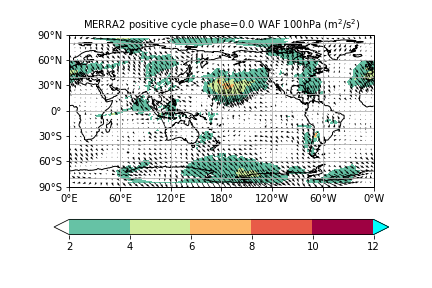
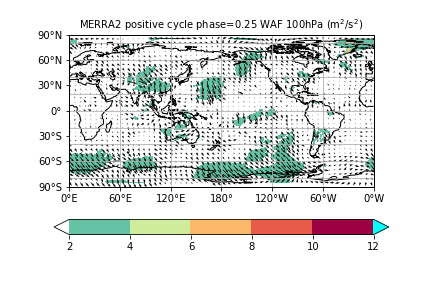
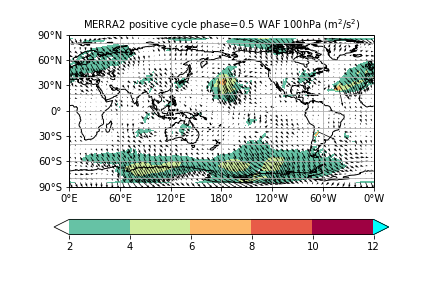
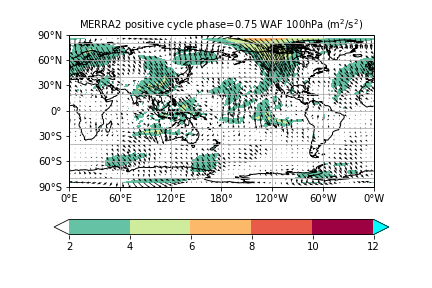
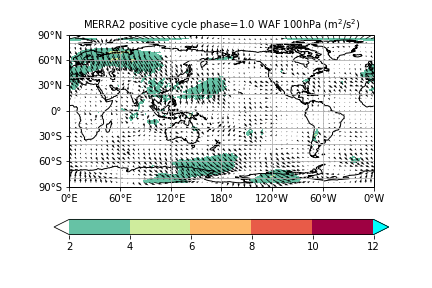


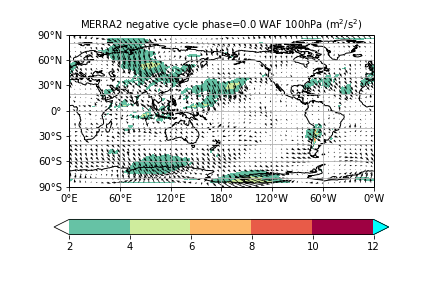
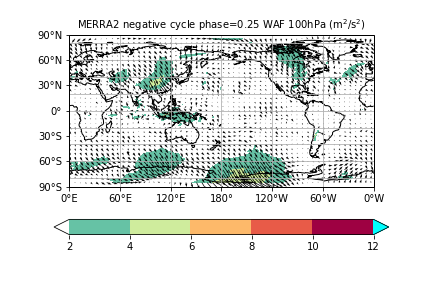
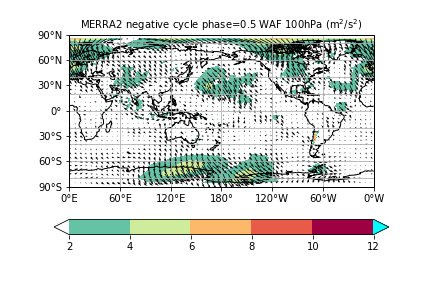
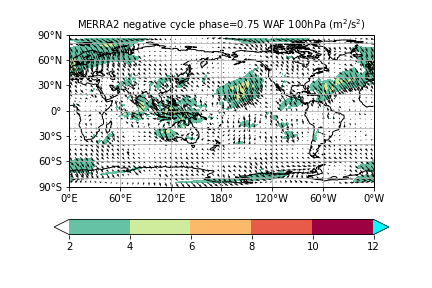
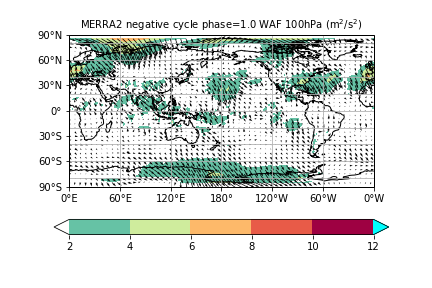


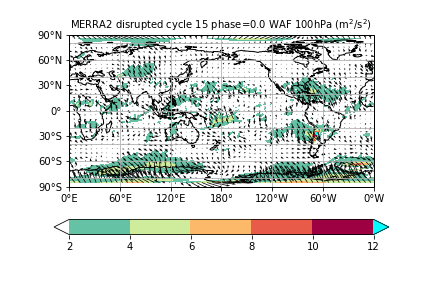
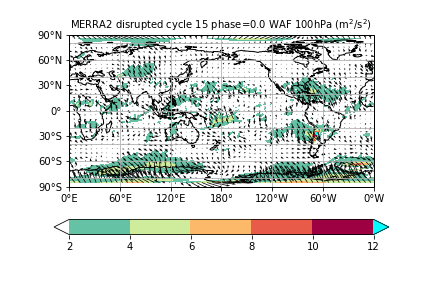
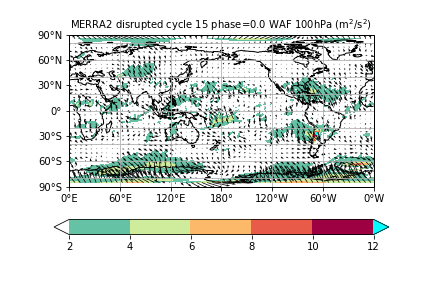
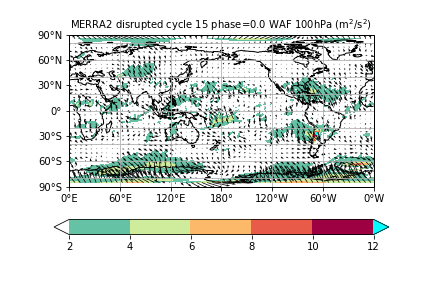
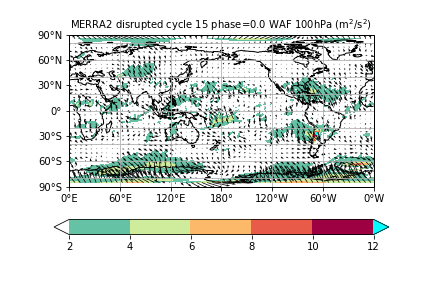
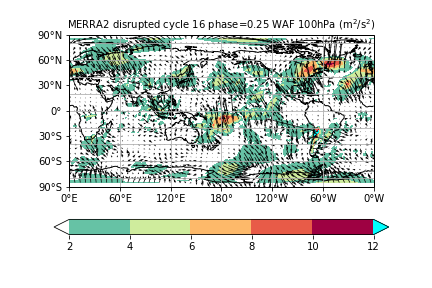
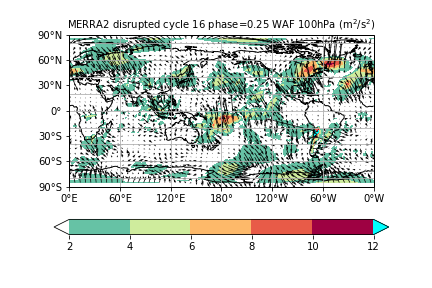
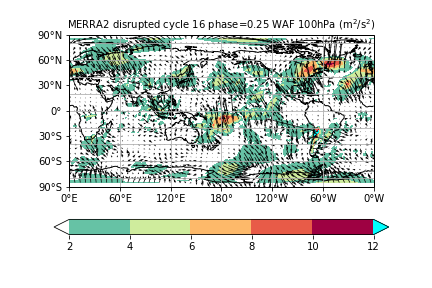
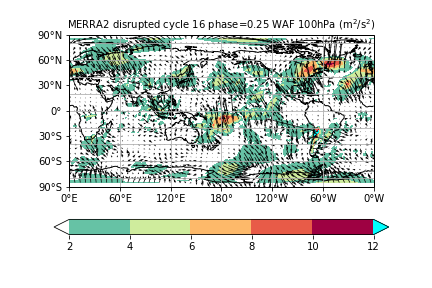
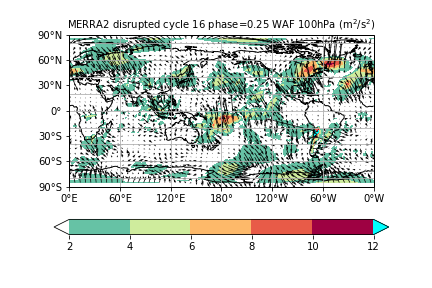
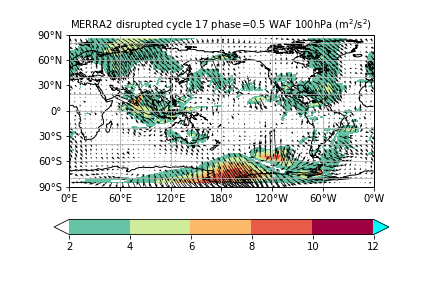
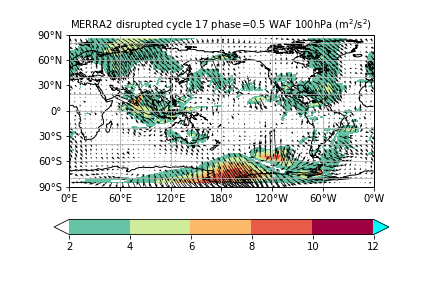
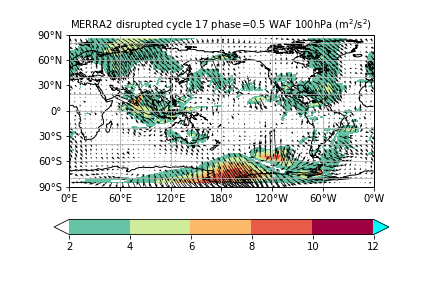
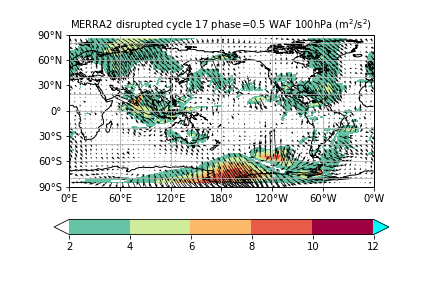
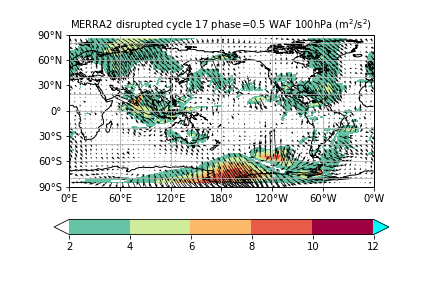

In [41]:
#WAF
colorbar=True
clevs=None
cmap='rainbow'
xysize=(8,4)
skip=10
skip_sp=10
skip_np=10
#level_choice=1 #0=100hPa, 1=40hPa, 2=10hPa
#time_choice=2
step=2;clevs=sorted(list(set(np.arange(2, 12+step, step).tolist())))
cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=False, \
              negative_infinity='white', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.8], \
              last_cmap='Spectral', \
              last_fraction=[0,.8], \
              first_flip=False, \
              last_flip=True)
    
#5 would be the number of slices per half cycle.
#for the positive it is 0+phase:75:5, the 75 comes from the 15 (*5) phases.
#for the negative it is 75+phase:150:5, the 150 comes from 75*2.
#would need to test to see if it works generally across all settings.

oPlot = FlowLayout()
for cnt,phase in enumerate(range(5)):
  #colorbar=True if cnt==0 else False
  phase_inds=[]
  for slice_phase in slice_phase_all[0+phase:75:5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )

#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
  for level_choice in range(1):
    U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
    lon_tmp = dataxr_merra2_ndays_WAF['lon']
    lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
    U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
    lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

    a=shade_2d_latlon( \
      np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
      xyvals=(lon_tmp, lat_tmp_poles), \
      title='MERRA2 positive cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
      units='$m^2/s^2$', \
      clevs=clevs, \
      cmap=cmap , \
      colorbar=colorbar, \
      colorbar_orientation='horizontal', \
      title_fontsize=10, \
      return_plot_object=True, \
      vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))
    
    oPlot.add_plot(a)
oPlot.PassHtmlToCell()
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
#     title='MERRA2 positive cycle phase='+str(phase/4), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
# #   ytik=[4,10,100], \
# #   ylim=[4,100], \
#     grid=True, \
#     clevs=clevs, \
#     cmap=cmap, \
#     colorbar=colorbar, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40,'red','--',5],) \
#     )

oPlot = FlowLayout()
for cnt,phase in enumerate(range(5)):
  #colorbar=True if cnt==0 else False
  phase_inds=[]
  for slice_phase in slice_phase_all[75+phase:150:5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )

#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
  for level_choice in range(1):
    U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
      .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
    lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
    lon_tmp = dataxr_merra2_ndays_WAF['lon']
    lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
    U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
      isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
      .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
    lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
    lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

    a=shade_2d_latlon( \
      np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
      xyvals=(lon_tmp, lat_tmp_poles), \
      title='MERRA2 negative cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
      units='$m^2/s^2$', \
      clevs=clevs, \
      cmap=cmap , \
      colorbar=colorbar, \
      title_fontsize=10, \
      return_plot_object=True, \
      vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))
    oPlot.add_plot(a)
oPlot.PassHtmlToCell()

#   shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
#     title='MERRA2 negative cycle phase='+str(phase/4), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
# #   ytik=[4,10,100], \
# #   ylim=[4,100], \
#     grid=True, \
#     clevs=clevs, \
#     cmap=cmap, \
#     colorbar=colorbar, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40,'red','--',5],) \
#     )  

oPlot = FlowLayout()
#not really phase, each 0,1,2 represents QBO cycle 15,16,17.
for phase in range(3):
  phase_inds=[]
  for slice_phase in slice_phase_all[150+phase*5:155+phase*5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )
  #print('phase_inds=',phase_inds)
  for cnt,phase_ind in enumerate(phase_inds):
    #print('cnt,phase_ind=',cnt,phase_ind)
    #colorbar=True if cnt==0 else False 
#   for level_choice in range(dataxr_merra2_ndays_WAF['level'].values.size):
    for level_choice in range(1):
      U_tmp_poles = dataxr_merra2_ndays_WAF.u_waf \
        .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
      V_tmp_poles = dataxr_merra2_ndays_WAF.v_waf \
        .isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np)).mean(axis=0)
      lat_tmp_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np))
      lon_tmp = dataxr_merra2_ndays_WAF['lon']
      lev_tmp = dataxr_merra2_ndays_WAF['level'].isel(level=level_choice).values
      U_tmp_thinned_poles = dataxr_merra2_ndays_WAF.u_waf. \
        isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
        .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
      V_tmp_thinned_poles = dataxr_merra2_ndays_WAF.v_waf. \
        isel(time=phase_inds).isel(level=level_choice).isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip)) \
        .isel(lon=slice(0,merra2_6hourly_nlon,skip)).mean(axis=0)
      lat_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lat'].isel(lat=slice(0+skip_sp,merra2_6hourly_nlat-skip_np,skip))
      lon_tmp_thinned_poles = dataxr_merra2_ndays_WAF['lon'].isel(lon=slice(0,merra2_6hourly_nlon,skip))

      a=shade_2d_latlon( \
        np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
        xyvals=(lon_tmp, lat_tmp_poles), \
        title='MERRA2 disrupted cycle '+str(phase+15)+' phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
        units='$m^2/s^2$', \
        clevs=clevs, \
        cmap=cmap , \
        colorbar=colorbar, \
        title_fontsize=10, \
        return_plot_object=True, \
        vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))

    oPlot.add_plot(a)
oPlot.PassHtmlToCell()

#     shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_ind).mean(axis=-1), \
#       title='MERRA2 disrupted cycle '+str(phase+15)+' phase='+str(cnt/4), \
#       units='m/s', \
#       reverse_yaxis=True, \
#       yscale='log', \
#       xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
#       xysize=xysize, \
#       xlab='Latitude', \
#       ylab='Pressure (hPa)', \
#       ytik=[1,10,100,1000], \
#       ylim=[1,1000], \
# #     ytik=[4,10,100], \
# #     ylim=[4,100], \
#       grid=True, \
#       clevs=clevs, \
#       cmap=cmap, \
#       colorbar=colorbar, \
#       n_contour=[0], \
#       polygons=([-90,90,40,40,'red','--',5],) \
#       ) 

#abc


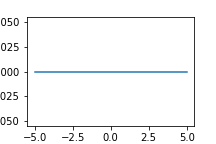
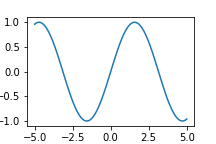
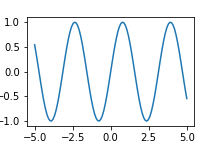
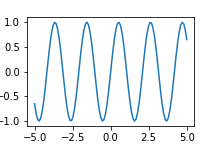
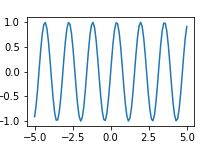
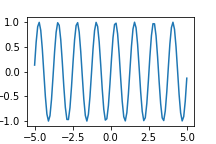
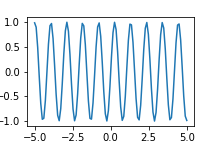
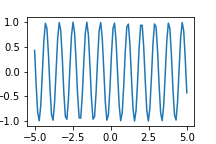
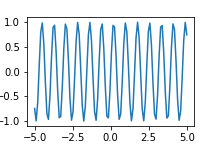
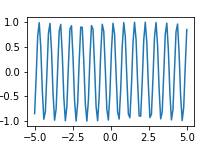

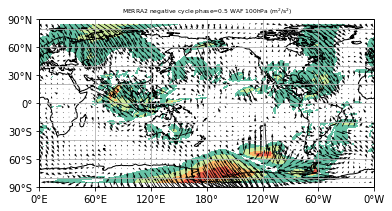


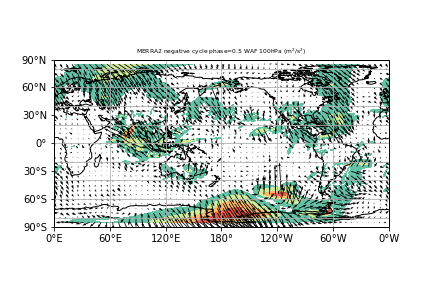
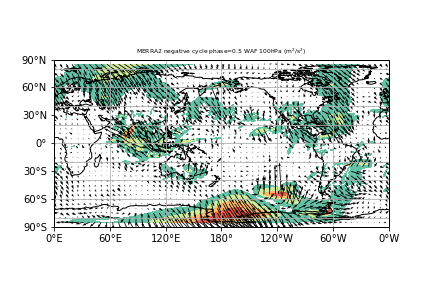
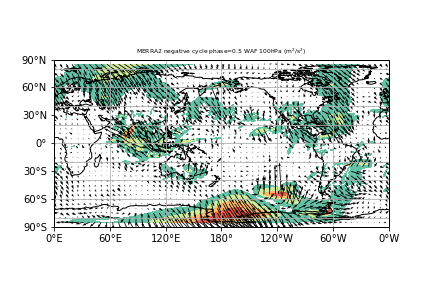
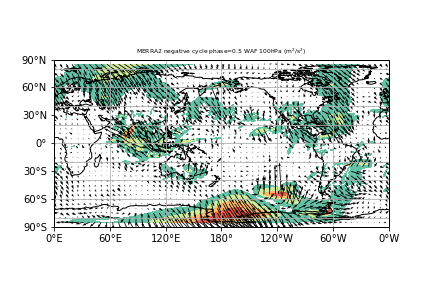
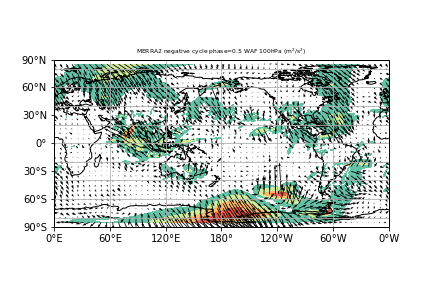
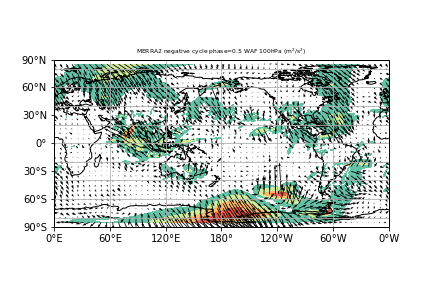

In [34]:
#https://stackoverflow.com/questions/21754976/ipython-notebook-arrange-plots-horizontally

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import io
import base64


class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))




oPlot = FlowLayout() # create an empty FlowLayout

# Some fairly regular plotting from Matplotlib
gX = np.linspace(-5,5,100) # just used in the plot example
for i in range(10): # plot 10 charts
    fig, ax = plt.subplots(1, 1, figsize=(3,2)) # same size plots
                           # figsize=(3+i/3,2+i/4)) # different size plots
    ax.plot(gX, np.sin(gX*i)) # make your plot here
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

a=shade_2d_latlon( \
  np.hypot(U_tmp_poles.values, V_tmp_poles.values), \
  xyvals=(lon_tmp, lat_tmp_poles), \
  title='MERRA2 negative cycle phase='+str(phase/4)+' WAF '+str(int(lev_tmp))+'hPa', \
  units='$m^2/s^2$', \
  clevs=clevs, \
  cmap=cmap , \
  colorbar=colorbar, \
  title_fontsize=6, \
  return_plot_object=True, \
  vector_arrays=((lon_tmp_thinned_poles.values, lat_tmp_thinned_poles.values, U_tmp_thinned_poles.values, V_tmp_thinned_poles.values, 'tail', 100, None),))

oPlot = FlowLayout()

oPlot.add_plot(a)
oPlot.add_plot(a)
oPlot.add_plot(a)
oPlot.add_plot(a)
oPlot.add_plot(a)
oPlot.add_plot(a)

oPlot.PassHtmlToCell()


In [ ]:
print('slice_phase_all=',slice_phase_all)

xysize=(15,3)

input_data = ()
input_xvals = ()
line_colors = []

for cnt,lines in enumerate(range(0,len(slice_phase_all),5)):
  print(cnt,lines,lines+5,slice_phase_all[lines:lines+5])
  input_data += (dataxr_merra2_ndays_U.sel(level=40).isel(time=slice(lines,lines+5)).sel(lat=slice(-5,5)).mean(axis=-1).mean(axis=-1), )
  input_xvals += ([0.,.25,.5,.75,1.],)
  if(cnt<=14): line_colors.append('lightblue')
  if(cnt>14 and cnt<=29): line_colors.append('red')
  if(cnt==30): line_colors.append('green')
  if(cnt==31): line_colors.append('aqua')
  if(cnt==32): line_colors.append('pink')

plot_xy(Diag=False, \
  title='MERRA2', units='m/s', xlab='cycle (fraction)', ylab='(m/s)', \
  input_data=input_data, \
  input_xvals=input_xvals, \
  line_colors=line_colors, \
  xysize=xysize, \
  legend_off=True, grid=True, xlim=[0,1], xticks=[0,.25,.5,.75,1.], ylim=[-35,35], yticks=[-40,-20,0,20,40], \
  polygons=([0,1,0,0,'black', '--', 2],))
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))


#print('dataxr_merra2_ndays_U=',dataxr_merra2_ndays_U)
    
# j = slice_phase_all[0+0:75:5]
# k = slice_phase_all[0+1:75:5]
# l = slice_phase_all[0+2:75:5]
# m = slice_phase_all[0+3:75:5]
# n = slice_phase_all[0+4:75:5]

# print(j)
# print(k)
# print(l)
# print(m)
# print(n)

output_type='pdf'
output_type='png'

xysize=(4,2)
cmap='rainbow'
clevs=None
step=10;clevs=sorted(list(set(np.arange(-60, 60+step, step).tolist())))
cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=True, \
              negative_infinity='pink', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.4], \
              last_cmap='Spectral', \
              last_fraction=[0,.4], \
              first_flip=False, \
              last_flip=True)

CNT=0
for phase in range(5):
  phase_inds=[]
  for cnt,slice_phase in enumerate(slice_phase_all[0+phase:75:5]):
    phase_inds.append( slice_phase_all.index(slice_phase) )
  CNT+=1
  output=('cycle'+str('{0:02d}'.format(CNT)), output_type)
  output=None
  
  shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
    title='MERRA2 positive cycle phase='+str(phase/4), \
    units='m/s', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
    xysize=xysize, \
    xlab='Latitude', \
    ylab='Pressure (hPa)', \
    ytik=[1,10,100,1000], \
    ylim=[1,1000], \
#     ytik=[4,10,100], \
#     ylim=[4,100], \
    grid=True, \
    clevs=clevs, \
    cmap=cmap, \
#     n_contour=[0], \
    polygons=([-90,90,40,40, 'red', '--', 5],), \
    output=output, \
    contour_arrays=((dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values, \
      dataxr_merra2_ndays_pmsi.isel(time=phase_inds).mean(axis=0)*1e-10,[-.5,-.3,-.1,.1,.3,.5]),), \
    hatching=( (dataxr_merra2_ndays_pmsi.isel(time=phase_inds).mean(axis=0)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,1,100,['+',None,'/'],False), \
      (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,-100,-1,['x',None,'\\'],False)), \
    )

#hatches=['.', '/', '\\', None, '\\\\', '*']

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

for phase in range(5):
  phase_inds=[]
  for cnt,slice_phase in enumerate(slice_phase_all[75+phase:150:5]):
    phase_inds.append( slice_phase_all.index(slice_phase) )
  CNT+=1
  output=('cycle'+str('{0:02d}'.format(CNT)), output_type)
  output=None
  shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_inds).mean(axis=0).mean(axis=-1), \
    title='MERRA2 negative cycle phase='+str(phase/4), \
    units='m/s', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
    xysize=xysize, \
    xlab='Latitude', \
    ylab='Pressure (hPa)', \
    ytik=[1,10,100,1000], \
    ylim=[1,1000], \
#     ytik=[4,10,100], \
#     ylim=[4,100], \
    grid=True, \
    clevs=clevs, \
    cmap=cmap, \
#     n_contour=[0], \
    polygons=([-90,90,40,40, 'red', '--', 5],), \
    output=output, \
    contour_arrays=((dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values, \
      dataxr_merra2_ndays_pmsi.isel(time=phase_inds).mean(axis=0)*1e-10,[-.5,-.3,-.1,.1,.3,.5]),), \
    hatching=( (dataxr_merra2_ndays_pmsi.isel(time=phase_inds).mean(axis=0)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,1,100,['+',None,'/'],False), \
      (dataxr_merra2_ndays_pmsi.isel(time=phase_inds).mean(axis=0)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,-100,-1,['x',None,'\\'],False)), \
    )
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

for phase in range(3):
  phase_inds=[]
  for slice_phase in slice_phase_all[150+phase*5:155+phase*5]:
    phase_inds.append( slice_phase_all.index(slice_phase) )
  #print('phase_inds=',phase_inds)
  for cnt,phase_ind in enumerate(phase_inds):
    #print('cnt,phase_ind=',cnt,phase_ind)
  
    shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_ind).mean(axis=-1), \
      title='MERRA2 disrupted cycle '+str(phase+15)+' phase='+str(cnt/4), \
      units='m/s', \
      reverse_yaxis=True, \
      yscale='log', \
      xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
      xysize=xysize, \
      xlab='Latitude', \
      ylab='Pressure (hPa)', \
      ytik=[1,10,100,1000], \
      ylim=[1,1000], \
#       ytik=[4,10,100], \
#       ylim=[4,100], \
      grid=True, \
      clevs=clevs, \
      cmap=cmap, \
#       n_contour=[0], \
      polygons=([-90,90,40,40,'red','--',5],), \
      contour_arrays=((dataxr_merra2_ndays_pmsi['lat'].values, \
        dataxr_merra2_ndays_pmsi['level'].values, \
        dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10,[-.5,-.3,-.1,.1,.3,.5]),), \
    hatching=( (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,1,100,['+',None,'/'],False), \
      (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,-100,-1,['x',None,'\\'],False)), \
        )

#dataxr_merra2_ndays_pmsi
phase_inds=[]    
for slice_phase in slice_phase_all[15:15+5]:
  phase_inds.append( slice_phase_all.index(slice_phase) )
  #print('phase_inds=',phase_inds)
for cnt,phase_ind in enumerate(phase_inds):
  #print('cnt,phase_ind=',cnt,phase_ind)

  shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_ind).mean(axis=-1), \
    title='MERRA2 positive cycle 3(0) phase='+str(cnt/4), \
    units='m/s', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
    xysize=xysize, \
    xlab='Latitude', \
    ylab='Pressure (hPa)', \
    ytik=[1,10,100,1000], \
    ylim=[1,1000], \
#       ytik=[4,10,100], \
#       ylim=[4,100], \
    grid=True, \
    clevs=clevs, \
    cmap=cmap, \
#     n_contour=[-15,-10,10,15], \
    polygons=([-90,90,40,40,'red','--',5],), \
    contour_arrays=((dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values, \
      dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10,[-.5,-.3,-.1,.1,.3,.5]),), \
    hatching=( (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,1,100,['+',None,'/'],False), \
      (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,-100,-1,['x',None,'\\'],False)), \
    )

#   clevs=None
#   cmap='rainbow'
#   step=.1;clevs=sorted(list(set(np.arange(-.5, .5+step, step).tolist())))
#   cmap = cmap_hero(clevs, \
#                 Diag=-1, \
#                 middle2white=True, \
#                 negative_infinity='pink', \
#                 positive_infinity='cyan', \
#                 first_cmap='Spectral_r', \
#                 first_fraction=[0,.4], \
#                 last_cmap='Spectral', \
#                 last_fraction=[0,.4], \
#                 first_flip=False, \
#                 last_flip=True)

#   shade_2d_simple(dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
#     title='MERRA2 positive cycle 3(0) phase='+str(cnt/4), \
#     units='kg/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(dataxr_merra2_ndays_pmsi['lat'].values, dataxr_merra2_ndays_pmsi['level'].values), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
# #     ytik=[1,10,100,], \
# #     ylim=[1,100], \
#     ytik=[1,10,100,1000], \
#     ylim=[1,1000], \
#     clevs=clevs, \
#     cmap=cmap, \
#     grid=True)
    
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  phase_inds=[]    
for slice_phase in slice_phase_all[60:60+5]:
  phase_inds.append( slice_phase_all.index(slice_phase) )
  #print('phase_inds=',phase_inds)
for cnt,phase_ind in enumerate(phase_inds):
  #print('cnt,phase_ind=',cnt,phase_ind)

  shade_2d_simple(dataxr_merra2_ndays_U.isel(time=phase_ind).mean(axis=-1), \
    title='MERRA2 positive cycle 12(0) phase='+str(cnt/4), \
    units='m/s', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(merra2_6hourly_lats, merra2_6hourly_levs), \
    xysize=xysize, \
    xlab='Latitude', \
    ylab='Pressure (hPa)', \
    ytik=[1,10,100,1000], \
    ylim=[1,1000], \
#       ytik=[4,10,100], \
#       ylim=[4,100], \
    grid=True, \
    clevs=clevs, \
    cmap=cmap, \
#     n_contour=[0], \
    polygons=([-90,90,40,40,'red','--',5],), \
    contour_arrays=((dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values, \
      dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10,[-.5,-.3,-.1,.1,.3,.5]),), \
    hatching=( (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,1,100,['+',None,'/'],False), \
      (dataxr_merra2_ndays_pmsi.isel(time=phase_ind)*1e-10, \
      dataxr_merra2_ndays_pmsi['lat'].values, \
      dataxr_merra2_ndays_pmsi['level'].values,-100,-1,['x',None,'\\'],False)), \
    )


    
    
# j=slice_phase_all[75+0:150:5]
# k=slice_phase_all[75+1:150:5]
# l=slice_phase_all[75+2:150:5]
# m=slice_phase_all[75+3:150:5]
# n=slice_phase_all[75+4:150:5]

# print(j)
# print(k)
# print(l)
# print(m)
# print(n)

# print('slice_phase_all=',slice_phase_all)

# print(slice_phase_all[150:])

# for phase in range(3):
#   phase_inds=[]
#   for slice_phase in slice_phase_all[150+phase*5:155+phase*5]:
#     phase_inds.append( slice_phase_all.index(slice_phase) )
#   print('phase_inds=',phase_inds)

print('END')

In [ ]:
def shade_2d_simple(data,**kwargs):
  '''
  plot a 2d array.
  '''
    
  import matplotlib.pyplot as plt
  #https://matplotlib.org/users/colormapnorms.html#custom-normalization-two-linear-ranges
  #http://chris35wills.github.io/matplotlib_diverging_colorbar/
  import matplotlib.colors as colors
  import numpy as np
  import inspect
  #from matplotlib.ticker import FormatStrFormatter
  from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FixedLocator

  # set the colormap and centre the colorbar
  class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
      self.midpoint = midpoint
      colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
      # I'm ignoring masked values and all kinds of edge cases to make a
      # simple example...
      x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
      return np.ma.masked_array(np.interp(value, x, y))

#import branca.colormap as cm
#https://stackoverflow.com/questions/47846744/create-an-asymmetric-colormap
#colormap = cm.LinearColormap(colors=['red','lightblue','blue'], index=[-3,0,12],vmin=-3,vmax=12)
#colormap

  xlab=ylab=xtik=ytik=output=n_contour=contour_arrays=hatching_arrays=None
  Diag = add_contours = title_check = units_check = extend_check = reverse_xaxis = reverse_yaxis = \
    xyvals_check = xlim_check = ylim_check = grid = xtik_check = ytik_check = cmap_check = \
    clevs_check = False
  polygons=None
  xsize,ysize=6.0,4.0
  yscale='linear'
  colorbar_orientation='vertical'
  x_lab_rotation='horizontal'
  y_lab_rotation='horizontal'
  for key, value in kwargs.items():
    if(Diag): print('key,value=',key,value)
    if(key=='Diag'):
      Diag=bool(value)
    elif(key=='xysize'):
      xsize,ysize=value
    elif(key=='clevs'):
      clevs=value
      clevs_check=True
    elif(key=='output'):
      output=value
    elif(key=='add_contours'):
      add_contours=bool(value)
    elif(key=='title'):
      title=value
      title_check=True
    elif(key=='units'):
      units=value
      units_check=True
    elif(key=='extend'):
      extend=value
      extend_check=True
    elif(key=='reverse_xaxis'):
      reverse_xaxis=bool(value)
    elif(key=='reverse_yaxis'):
      reverse_yaxis=bool(value)
    elif(key=='xyvals'):
      xvals,yvals=value
      xyvals_check=True
    elif(key=='xlim'):
      xlim=value
      xlim_check=True
    elif(key=='ylim'):
      ylim=value
      ylim_check=True
    elif(key=='xlab'):
      xlab=value
      xlab_check=True
    elif(key=='ylab'):
      ylab=value
      ylab_check=True
    elif(key=='xtik'):
      xtik=value
      xtik_check=True
    elif(key=='ytik'):
      ytik=value
      ytik_check=True
    elif(key=='grid'):
      grid=bool(value)
    elif(key=='cmap'):
      cmap=value
      cmap_check=True
    elif(key=='yscale'):
      yscale=value
    elif(key=='n_contour'):
      n_contour=value
    elif(key=='contour_arrays'):
      contour_arrays=value
    elif(key=='polygons'):
      polygons=value
    elif(key=='hatching'):
      hatching_arrays=value
      #hatching,hatching_x,hatching_y,hatching_lev_min,hatching_lev_max=value
    elif(key=='colorbar_orientation'):
      colorbar_orientation=value
    elif(key=='x_lab_rotation'):
      x_lab_rotation=value
      if(Diag): print('Rotating x labels.')
    elif(key=='y_lab_rotation'):
      y_lab_rotation=value
      if(Diag): print('Rotating y labels.')
    else:
      raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

  if(not title_check): title='data'
  if(not units_check): units='units'  
  if(not extend_check): extend='both'
  if(not cmap_check): cmap='jet'
    
  #print('xvals=',xvals)
  #print('yvals=',yvals)
  
  if(not xyvals_check):
    xvals = np.linspace(0, data.shape[1]-1, data.shape[1])
    yvals = np.linspace(0, data.shape[0]-1, data.shape[0])
    
  #print('len(xvals.shape)=',len(xvals.shape))
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  if(len(xvals.shape)==2):
    if(len(yvals.shape)!=2):
      raise SystemExit('Problem with yvals.shape.'+__file__+' line number: '+str(inspect.stack()[0][2]))
    X=xvals
    Y=yvals
  else:
    (X, Y) = np.meshgrid(xvals, yvals)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   print('X.shape=',X.shape)
#   print('Y.shape=',Y.shape)
#   print('data.shape=',data.shape)
  
  fig,ax=plt.subplots()
  fig.set_size_inches(xsize, ysize)

  #fig = plt.gcf()
  #fig.set_size_inches(xsize, ysize) #default 6.0,4.0

  #print('clevs=',clevs)
  if(not clevs_check or type(clevs)==type(None)):
    cs=plt.contourf(X, Y, data, extend=extend, cmap=cmap) #good
#     cs=plt.pcolormesh(X, Y, data, cmap=cmap)
  else:
    cs=plt.contourf(X, Y, data, clevs, extend=extend, cmap=cmap) #good

  if(type(hatching_arrays)!=type(None)):
    for cnt in range(len(hatching_arrays)):
      hatching,hatching_x,hatching_y,hatching_lev_min,hatching_lev_max,hatching_style,hatching_fill = hatching_arrays[cnt]
      ch=plt.contourf(hatching_x, hatching_y, hatching, levels=[hatching_lev_min, hatching_lev_max], colors='none', \
        hatches=hatching_style, fill=hatching_fill, extend='lower')

#hatches=['.', '/', '\\', None, '\\\\', '*']

  #print(hatching)
#   if(type(hatching)!=type(None)):
#     #print('hatching')
#     ch=plt.contourf(hatching_x, hatching_y, hatching, levels=[hatching_lev_min, hatching_lev_max], colors='none', \
#       hatches=['.', '/', '\\', None, '\\\\', '*'], extend='lower')
    
  if(type(n_contour)!=type(None)):
    nc=plt.contour(X, Y, data, levels=n_contour, colors='black')
    plt.clabel(nc, inline=False, fontsize=10, fmt='%3.0f') #, manual=manual_locations)

  if(type(contour_arrays)!=type(None)):
    colours=['black','pink','green','orange','purple','cyan']
    #print('xxx',len(contour_arrays))
    for cnt in range(len(contour_arrays)):
      anotherX,anotherY,anotherdata,anotherlevels = contour_arrays[cnt]
      
#       print('anotherX=',anotherX)
#       print('anotherY=',anotherY)
#       print('anotherdata=',anotherdata)
#       print('anotherlevels=',anotherlevels)

      #ca=plt.contour(anotherX, anotherY, anotherdata, colors=colours[cnt], levels=n_contour, linewidths=[1,1,1,5,1,1,1,1,1]) #something odd when I specify values for each level...
      #ca=plt.contour(anotherX, anotherY, anotherdata, colors=colours[cnt], levels=n_contour)
      ca=plt.contour(anotherX, anotherY, anotherdata, colors=colours[cnt], levels=anotherlevels)
      #ca=plt.contour(anotherX, anotherY, anotherdata, colors=colours[cnt])
      #print('xxx',plt.rcParams['lines.linewidth']) #this gives linewidth.

      plt.clabel(ca, inline=False, fontsize=10, fmt='%3.0f') #, manual=manual_locations)

    #raise SystemExit('Forced exit file:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#     cs=plt.pcolormesh(X, Y, data, clevs, cmap=cmap)
    #cs=plt.contourf(X, Y, data, extend=extend, norm=MidpointNormalize(midpoint=0.,vmin=-1,vmax=1), cmap=cmap)
    #cs=plt.contourf(X, Y, data, extend=extend, norm=MidpointNormalize(midpoint=0.,vmin=-5,vmax=20), cmap=cmap)
    #cs=plt.contourf(X, Y, data, extend=extend, norm=MidpointNormalize(midpoint=0.,vmin=np.min(data),vmax=np.max(data)), cmap=cmap)
  
  if(add_contours): plt.contour(X, Y, data,colors='black')
#plt.colorbar(fill, orientation='horizontal')
  cb=plt.colorbar(cs, orientation=colorbar_orientation) #,extend=extend)
  cb.set_label(units)
  
  ###
  
  if(type(title)!=type(None)):
    if(type(units)==type(None)):
      plt.title(title, fontsize=16)
    else:
      plt.title(title+' ('+units+')', fontsize=16)

  if(xlim_check): plt.xlim(xlim)
      
  if(ylim_check): plt.ylim(ylim)
          
  if(reverse_xaxis): plt.gca().invert_xaxis()
      
  if(reverse_yaxis): plt.gca().invert_yaxis()
    
  if(type(xlab)!=type(None)): plt.xlabel(xlab)

  if(type(ylab)!=type(None)): plt.ylabel(ylab)
    
  #plt.ylim((0,1000))
  #https://matplotlib.org/gallery/scales/symlog_demo.html#sphx-glr-gallery-scales-symlog-demo-py
  #plt.yscale('symlog')

  plt.yscale(yscale)

  if(yscale!='linear'):
    #minorLocator = FixedLocator([100,500,900])
    #ax.yaxis.set_major_locator(minorLocator)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
    #ax.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
  
  if(grid): plt.grid(True,linestyle='-')
   
  if(type(polygons)!=type(None)):
    for ppp in range(len(polygons)):
      #print('ppp=',ppp)
      ax.plot(np.array([polygons[ppp][0],polygons[ppp][1]]), \
              np.array([polygons[ppp][2],polygons[ppp][3]]), \
              color=polygons[ppp][4], \
              linestyle=polygons[ppp][5], \
              linewidth=polygons[ppp][6], \
             )
      
      #raise SystemExit('Forced exit file:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  locs, labels = plt.xticks()
  
  #plt.xticks(range(-90, 90, 30), fontsize=14)
#  if(type(xtik)!=type(None)): plt.xticks(xtik)  

  #print('len(ytik)=',len(ytik))
  if(type(xtik)!=type(None)):
    if(len(xtik)==2):
      xtik_vals,xtik_labs=xtik
      plt.xticks(xtik_vals,xtik_labs,rotation=x_lab_rotation)
    else:
      plt.xticks(xtik,rotation=x_lab_rotation) 

  #print('len(ytik)=',len(ytik))
  if(type(ytik)!=type(None)):
    if(len(ytik)==2):
      ytik_vals,ytik_labs=ytik
      plt.yticks(ytik_vals,ytik_labs,rotation=y_lab_rotation)
    else:
      plt.yticks(ytik,rotation=y_lab_rotation) 

  #plt.yticks(range(12), ['J','F','M','A','M','J','J','A','S','O','N','D'], rotation='horizontal')

  #print('locs=',locs)
  #print('labels=',labels[:])

  if(type(output)!=type(None)):
    prefix,suffix=output
    plt.savefig(prefix+'.'+suffix)
    print('Image saved to ',prefix+'.'+suffix)
  else:
    #pylab.show()
    plt.show()

  return() #end shade_2d_simple

print('END')

In [ ]:
#green to red:
#index_months_west_to_east= [  22  195  377  560  x663 751  938 1090 1258 1396 1611 1769 1922 2067 x2165 2237 2433 2594 x2668 x2747]
#red to green:
#index_months_east_to_west= [ 105  262  472  648  681  833 1014 1182 1334 1496 1701 1850 1997 2156 2178  2330 2515 2637 x2746 x2752]

#full postiive QBO cycle is between times
positive_qbos = []
positive_qbos.append([22+1,105]) #0
positive_qbos.append([195+1,262]) #1
positive_qbos.append([377+1,472]) #2
positive_qbos.append([560+1,681]) #3, originall had 648.
positive_qbos.append([751+1,833]) #4
positive_qbos.append([938+1,1014]) #5
positive_qbos.append([1090+1,1182]) #6
positive_qbos.append([1258+1,1334]) #7
positive_qbos.append([1396+1,1496]) #8
positive_qbos.append([1611+1,1701]) #9
positive_qbos.append([1769+1,1850]) #10
positive_qbos.append([1922+1,1997]) #11
positive_qbos.append([2067+1,2178]) #12, originall had 2156.
positive_qbos.append([2237+1,2330]) #13
positive_qbos.append([2433+1,2515]) #14

#full negative QBO cycle is between times
negative_qbos = []
negative_qbos.append([105+1,195]) #0
negative_qbos.append([262+1,377]) #1
negative_qbos.append([472+1,560]) #2
negative_qbos.append([681+1,751]) #3
negative_qbos.append([833+1,938]) #4
negative_qbos.append([1014+1,1090]) #5
negative_qbos.append([1182+1,1258]) #6
negative_qbos.append([1334+1,1396]) #7
negative_qbos.append([1496+1,1611]) #8
negative_qbos.append([1701+1,1769]) #9
negative_qbos.append([1850+1,1922]) #10
negative_qbos.append([1997+1,2067]) #11
negative_qbos.append([2178+1,2237]) #12
negative_qbos.append([2330+1,2433]) #13
negative_qbos.append([2515+1,2594]) #14

other_qbos = []
other_qbos.append([2594+1,2637]) #positive 15
other_qbos.append([2637+1,2668]) #negative 16
other_qbos.append([2668+1,2746]) #positive 17


#3 more half phases of QBO interuption. positive: 2594+1->2637=43, negative:2637+1->2668=30, positive: 2668+1->2746=77

In [ ]:
2668-2638
# fraction_date_times = merra2_ndays_date_time_stamps[slice_index_all]

# print('fraction_date_times=',fraction_date_times)

# fraction_num_times = netCDF4.date2num(fraction_date_times, merra2_6hourly_time_units, merra2_6hourly_time_calendar)

# print('fraction_num_times=',fraction_num_times)

In [ ]:

print(merra2_6hourly_pentad_indices[47])

years_to_process = [] #could be more than 1 year involved.
merra2_6hourly_pentad_date_time_stamps = []
for indice in merra2_6hourly_pentad_indices[139]:
  merra2_6hourly_pentad_date_time_stamps.append( datetime.datetime( \
  dataxr_merra2_6hourly_times_year[indice], \
  dataxr_merra2_6hourly_times_month[indice], \
  dataxr_merra2_6hourly_times_day[indice]) + \
  datetime.timedelta(hours=dataxr_merra2_6hourly_times_hour[indice]))
  years_to_process.append( dataxr_merra2_6hourly_times_year[indice] )

years_to_process = list(set(years_to_process))

print('merra2_6hourly_pentad_date_time_stamps=',merra2_6hourly_pentad_date_time_stamps)

print('years_to_process=',years_to_process)

for year in years_to_process:
  print('year=',year)

  ifil_merra2_6hourly_3D=[]

  if(year==ybeg_merra2_6hourly):
    mbeg=mbeg_merra2_6hourly
    mend=12
  elif(year==yend_merra2_6hourly):
    mbeg=1
    mend=mend_merra2_6hourly
  else:
    mbeg=1
    mend=12 

  for month in range(mbeg, mend+1):
    #print('year,month=',year,month)
    YYYY='{0:04d}'.format(year)
    MM='{0:02d}'.format(month)
    ifil_merra2_6hourly_3D+=glob.glob(idir_merra2_6hourly+'/'+'MERRA2_?00.inst6_3d_ana_Np.'+YYYY+MM+'??.nc')
    
input_files_merra2_6hourly_3D=sorted(ifil_merra2_6hourly_3D)

#print('input_files_merra2_6hourly_3D=',input_files_merra2_6hourly_3D)

merra2_6hourly_ifhN_3D = netCDF4.MFDataset(input_files_merra2_6hourly_3D, 'r')

times = merra2_6hourly_ifhN_3D.variables['time']

units = times.units

print('times[0]=',times[0])

print('units=',units)

first_date_time = netCDF4.num2date(times[0], units, merra2_6hourly_time_calendar)

print('first_date_time=',first_date_time)

first_num_time = netCDF4.date2num(first_date_time, units, merra2_6hourly_time_calendar)

print('first_num_time=',first_num_time)

merra2_6hourly_U = merra2_6hourly_ifhN_3D.variables['U']

merra2_6hourly_U_shape = merra2_6hourly_U.shape

days = np.arange(merra2_6hourly_U_shape[0])*(1/ntimes_per_day)

print('days=',days)

all_date_times = netCDF4.num2date(days+times[0], units.replace('minutes','days'), merra2_6hourly_time_calendar)

print('all_date_times=',all_date_times)
# print('merra2_6hourly_U_shape=',merra2_6hourly_U_shape)
 
all_num_times = netCDF4.date2num(all_date_times, units.replace('minutes','days'), merra2_6hourly_time_calendar)

print('all_num_times=',all_num_times)

merra2_6hourly_ifhN_3D.close()

j=np.where(merra2_6hourly_pentad_date_time_stamps[0] == all_date_times)

print('j=',j)

print('END')

In [ ]:
#full postiive QBO cycle is between times
# positive_qbos = []
# positive_qbos.append([46+1,139])
# positive_qbos.append([241+1,324])

# #full negative QBO cycle is between times
# negative_qbos = []
# negative_qbos.append([139+1,241])
# negative_qbos.append([324+1,402])

#full postiive QBO cycle is between times
positive_qbos = []
positive_qbos.append([22+1,105]) #0
positive_qbos.append([195+1,262]) #1
positive_qbos.append([377+1,472]) #2
positive_qbos.append([560+1,681]) #3, originall had 648.
positive_qbos.append([751+1,833]) #4
positive_qbos.append([938+1,1014]) #5
positive_qbos.append([1090+1,1182]) #6
positive_qbos.append([1258+1,1334]) #7
positive_qbos.append([1396+1,1496]) #8
positive_qbos.append([1611+1,1701]) #9
positive_qbos.append([1769+1,1850]) #10
positive_qbos.append([1922+1,1997]) #11
positive_qbos.append([2067+1,2178]) #12, originall had 2156.
positive_qbos.append([2237+1,2330]) #13
positive_qbos.append([2433+1,2515]) #14

#full negative QBO cycle is between times
negative_qbos = []
negative_qbos.append([105+1,195]) #0
negative_qbos.append([262+1,377]) #1
negative_qbos.append([472+1,560]) #2
negative_qbos.append([681+1,751]) #3
negative_qbos.append([833+1,938]) #4
negative_qbos.append([1014+1,1090]) #5
negative_qbos.append([1182+1,1258]) #6
negative_qbos.append([1334+1,1396]) #7
negative_qbos.append([1496+1,1611]) #8
negative_qbos.append([1701+1,1769]) #9
negative_qbos.append([1850+1,1922]) #10
negative_qbos.append([1997+1,2067]) #11
negative_qbos.append([2178+1,2237]) #12
negative_qbos.append([2330+1,2433]) #13
negative_qbos.append([2515+1,2594]) #14

other_qbos = []
other_qbos.append([2594+1,2637]) #positive 15
other_qbos.append([2637+1,2668]) #negative 16
other_qbos.append([2668+1,2746]) #positive 17

#2 sets of positive/negative phases (pairs, 1-15) over 1980-2018 period.
#3 more half phases 16,17,18 of QBO interuption. positive: 2594+1->2637=42, negative:2637+1->2668=30, positive: 2668+1->2746=77

slices_per_half_cycle = 9
slices_per_half_cycle = 19
slices_per_half_cycle = 5 #roughly 6 per month with pentads.

slice_phase_positive=[]
slice_index_positive=[]
for cnt,positive_qbo in enumerate(positive_qbos):
  len_qbo = positive_qbo[1]-positive_qbo[0]+0
  print(str(cnt)+' half cycle positive len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for slice_now in range(slices_per_half_cycle):
    slice_phase_positive.append(cnt+1)
    slice_index.append(     positive_qbos[cnt][0] + len_qbo*slice/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice_now],int(slice_index[slice_now])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_positive.append( list(map(int, slice_index)) )
print('slice_phase_positive=',slice_phase_positive)
print('slice_index_positive=',slice_index_positive)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

slice_phase_negative=[]
slice_index_negative=[]
for cnt,negative_qbo in enumerate(negative_qbos):
  len_qbo = negative_qbo[1]-negative_qbo[0]+0
  print(str(cnt)+' half cycle negative len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for slice_now in range(slices_per_half_cycle):
    slice_phase_negative.append((cnt+1)*-1)
    slice_index.append(     negative_qbos[cnt][0] + len_qbo*slice/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice_now],int(slice_index[slice_now])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_negative.append( list(map(int, slice_index)) )
print('slice_phase_negative=',slice_phase_negative)
print('slice_index_negative=',slice_index_negative)

slice_phase_other=[]
slice_index_other=[]
for cnt,other_qbo in enumerate(other_qbos):
  len_qbo = other_qbo[1]-other_qbo[0]+0
  print(str(cnt)+' half cycle other len_qbo=',str(len_qbo)+' '+str(len_qbo*ndays_in_average)+' days', str(len_qbo*ndays_in_average/30)+' months (approx.))')
  slice_index=[]
  for slice_now in range(slices_per_half_cycle):
    slice_phase_other.append(0)
    slice_index.append(     other_qbos[cnt][0] + len_qbo*slice/(slices_per_half_cycle-1) -0     )
    print('slice_now,slice_index[slice],int(slice_index[slice])=',slice_now,slice_index[slice_now],int(slice_index[slice_now]))
  print('slice_index[-1]-slice_index[0]=',slice_index[-1]-slice_index[0]) #should be same as len_qbo.
  slice_index_other.append( list(map(int, slice_index)) )
print('slice_phase_other=',slice_phase_other)
print('slice_index_other=',slice_index_other)

slice_index_all = [x for xs in [*slice_index_positive, *slice_index_negative, *slice_index_other] for x in xs] #go positive then negative, as this is the order from 1980.

print('slice_index_all=',slice_index_all)

slice_phase_all = [x for xs in [slice_phase_positive, slice_phase_negative, slice_phase_other] for x in xs] #go positive then negative, as this is the order from 1980.

print('slice_phase_all=',slice_phase_all)

print('END')

In [ ]:
list(map(int, slice_index))


In [ ]:
merra2_6hourly_ifhN_3D.close()

In [ ]:
print('BEGIN')

data_sign=np.sign(dataxr_merra2_6hourly_QBO)

print('data_sign=',data_sign)

#data_sign.shape

data_sign_diff=data_sign[1:].values-data_sign[0:-1].values

#print('data_sign_diff=',data_sign_diff)

index_months_west_to_east,=np.where(data_sign_diff==2) #west to east (or easterly to westerly)

index_months_east_to_west,=np.where(data_sign_diff==-2) #east to west (or westerly to easterly)

print('index_months_west_to_east=',index_months_west_to_east) #negative to positive

print('index_months_east_to_west=',index_months_east_to_west) #positive to negative

data_months_west_to_east=[[],[],[],[],[],[],[],[],[],[],[],[]]
data_months_east_to_west=[[],[],[],[],[],[],[],[],[],[],[],[]]

for k in index_months_west_to_east:
  print(k,merra2_6hourly_date_time_stamps[k].year,merra2_6hourly_date_time_stamps[k].month)
  data_months_west_to_east[merra2_6hourly_date_time_stamps[k].month-1].append(k)
  
for k in index_months_east_to_west:
  print(k,merra2_6hourly_date_time_stamps[k].year,merra2_6hourly_date_time_stamps[k].month)
  data_months_east_to_west[merra2_6hourly_date_time_stamps[k].month-1].append(k)
  
print('data_months_west_to_east=',data_months_west_to_east)
print('data_months_east_to_west=',data_months_east_to_west)

print('END')